# Time Series Overview
## Dell AI Delivery Academy
### [Dr. Elias Jacob de Menezes Neto](https://sigaa.ufrn.br/sigaa/public/docente/portal.jsf?siape=2353000)

# Summary

## Keypoints

- Time series data is characterized by explicit order dependence between observations, adding a temporal dimension that serves as both a constraint and a valuable source of information.

- The four primary components of a time series are: Level (baseline value), Trend (long-term direction), Seasonality (regular patterns or cycles), and Noise (random variability).

- Traditional random splitting is inappropriate for time series data; instead, methods like expanding windows or sliding windows should be used to preserve chronological order and temporal integrity.

- Lag features transform time series forecasting into a supervised learning problem by creating input-output pairs from sequential data points, enabling the use of standard machine learning algorithms.

- Walk-forward validation simulates real-world prediction scenarios by ensuring that models are trained only on past data and tested on future data, providing a more accurate assessment of forecasting performance.

- Autocorrelation plots visualize the relationship between a time series and its lagged versions, aiding in identifying patterns, seasonality, and determining appropriate lag values for modeling.

## Takeaways

- Expanding windows and rolling windows offer different trade-offs in time series analysis: expanding windows capture long-term trends but require more computational resources, while rolling windows are more efficient but may miss long-term patterns.

- Specialized time series forecasting models like ARIMA, Prophet, and ETS are designed to handle the unique characteristics of temporal data, often outperforming standard machine learning models in forecasting tasks.

- Time series decomposition, which breaks down data into trend, seasonality, and residual components, facilitates better understanding of fundamental patterns and can improve forecasting accuracy by allowing separate modeling of each component.

- Maintaining temporal disjointness is crucial in time series forecasting to prevent data leakage and ensure honest model evaluation that reflects real-world performance.

- The choice between expanding and rolling windows should consider factors such as the nature of the time series, available computational resources, prediction horizon, and data volatility.

- Performance metrics like R² score, Mean Absolute Error (MAE), and Root Mean Squared Error (RMSE) provide valuable insights into model accuracy, but should be interpreted in the context of the specific application and domain expertise.

In [1]:
# Import necessary libraries and modules

# Suppress warnings to keep the output clean
import warnings

# Import typing utilities for type hints
from typing import Dict, List, Tuple

# Import numerical and data manipulation libraries
import numpy as np
import pandas as pd

# Import Plotly for interactive plotting
import plotly.express as px
import plotly.graph_objects as go

# Import sktime for time series forecasting
import sktime

# Import scikit-learn utilities for machine learning tasks
from sklearn.base import BaseEstimator
from sklearn.datasets import make_classification  # For generating synthetic classification datasets
from sklearn.ensemble import RandomForestRegressor  # Random forest regressor for regression tasks
from sklearn.metrics import (mean_absolute_error, r2_score, root_mean_squared_error)  # Evaluation metrics
from sklearn.model_selection import KFold, TimeSeriesSplit, train_test_split  # Cross-validation and data splitting
from sklearn.neural_network import MLPRegressor  # Multi-layer perceptron regressor

# Import various forecasting models from sktime
from sktime.forecasting.arima import AutoARIMA
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.bats import BATS
from sktime.forecasting.ets import AutoETS
from sktime.forecasting.exp_smoothing import ExponentialSmoothing
from sktime.forecasting.fbprophet import Prophet
from sktime.forecasting.model_evaluation import evaluate
from sktime.forecasting.naive import NaiveForecaster
from sktime.forecasting.statsforecast import StatsForecastAutoARIMA
from sktime.forecasting.structural import UnobservedComponents
from sktime.forecasting.tbats import TBATS
from sktime.forecasting.theta import ThetaForecaster

# Import performance metrics for forecasting from sktime
from sktime.performance_metrics.forecasting import MeanSquaredError

# Import data splitting utilities from sktime
from sktime.split import ExpandingWindowSplitter, SlidingWindowSplitter

# Import transformation utilities from sktime
from sktime.transformations.series.lag import Lag

# Import seasonal decomposition from statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose

# Import tqdm for progress bars
from tqdm import tqdm

# Time Series Forecasting

In this class, we will dive into the fascinating world of time series analysis and forecasting. Time series data is ubiquitous in various domains, from finance and economics to healthcare and climate science. Understanding how to effectively analyze and predict future values in time series is a crucial skill for data scientists and machine learning practitioners.

In machine learning, time series forecasting is a crucial area that, unfortunately, often goes underappreciated. Nevertheless, its significance cannot be overstated due to the prevalence of prediction problems involving a time component. The innate complexity of dealing with time as a variable is one reason these problems often receive less attention.

## Importance of Time Series Analysis
Time series analysis is a critical area of study due to its wide-ranging applications and the valuable insights it provides. Some key reasons why understanding time series is crucial:

1. **Forecasting and Planning**: Accurate forecasts enable businesses and organizations to make informed decisions, optimize resource allocation, and plan for the future.

2. **Anomaly Detection**: Time series analysis helps identify unusual patterns or anomalies in data, which can be indicative of significant events or issues that require attention.

3. **Understanding Temporal Dynamics**: By analyzing time series data, we can gain insights into how variables grow over time, uncover fundamental trends, and identify seasonal or cyclical patterns.

4. **Risk Management**: In fields like finance and economics, time series analysis is essential for assessing and managing risks, such as market volatility or economic downturns.

## Our dataset

In this class, we will be working with a dataset containing daily counts of legal cases from the `Tribunal Regional Federal da 5a Região` (TRF5) in Brazil from 2006 to 2021. The dataset includes information for various states in the region, such as Rio Grande do Norte (RN), Paraíba (PB), Pernambuco (PE), Alagoas (AL), Sergipe (SE), and Ceará (CE).

This rich dataset will allow us to explore time series concepts, apply different analysis techniques, and build forecasting models to predict future case counts. By working with real-world data, we can gain practical experience and insights into the challenges and opportunities in time series analysis. The dataset contains the following columns:

- `date`: The date of the observation.
- `RN`: The number of new cases for Federal Courts in Rio Grande do Norte
- `PB`: The number of new cases for Federal Courts in Paraíba
- `PE`: The number of new cases for Federal Courts in Pernambuco
- `AL`: The number of new cases for Federal Courts in Alagoas
- `SE`: The number of new cases for Federal Courts in Sergipe
- `CE`: The number of new cases for Federal Courts in Ceará

## Importance of Time in Machine Learning

In standard machine learning datasets, time does play a role, albeit implicitly. For instance:
- Predictions are made for new data, where the actual outcomes may not be known until a future date.
- Here, the future is being predicted, yet all past observations are typically treated equally.
- Minor temporal adjustments may sometimes be made to account for concept drift (i.e., changes over time). An example is using only recent data (e.g., the last year) rather than all historical data.

## How Time Series Differs from Regular Datasets

A time series dataset introduces explicit order dependence between observations, encapsulating this time dimension. This additional dimension serves both as a constraint and a source of valuable information.

**Key Characteristics of Time Series Data:**
- **Sequential Order:** Observations are taken sequentially over time.
- **Dependence:** Past values influence future values, creating a natural order.
- **Structure:** The temporal structure can be leveraged to uncover patterns and trends not apparent in unordered data.

## Challenges in Time Series Forecasting

The introduction of a time dimension brings unique challenges, such as:
- **Autocorrelation:** The value at a given time point is correlated with previous values.
- **Non-stationarity:** The statistical properties of the time series (mean, variance) may change over time.
- **Seasonality:** Regular patterns or cycles in the data, like daily or yearly effects.
- **Trend:** Long-term increase or decrease in the data over time.

## Why Understand Time Series Forecasting?

Understanding time series forecasting methods and principles is vital for effectively addressing prediction problems where time plays a critical role. These include but are not limited to:
- Financial market predictions
- Sales forecasting
- Climate modeling
- Inventory management


> **Note:** A time series is fundamentally a sequence of observations indexed in chronological order. Recognizing and exploiting its built-in structure allows for better forecasting models, setting apart time series analysis from other predictive modeling tasks.

-----

## Time Series Nomenclature

Understanding the standard terms used to describe time series data is crucial for effective analysis and communication. Let's define some key concepts in time series nomenclature.

### Key Terms and Definitions

- **Current Time (t):** The present point in time.
- **Observation at Current Time (obs(t)):** The value or measurement recorded at the current time.

### Lag Times

When working with time series data, we often need to refer to observations from prior times, known as lag times or simply lags. These lag times are critical for analyzing patterns and making predictions.

- **Past Times (t-n):** Times preceding the current time are represented as negative offsets relative to t.
- **Example:**
- t-1: One period before the current time.
- t-2: Two periods before the current time.
- **Observations:**
- obs(t-1): The observation at one period before the current time.
- obs(t-2): The observation at two periods before the current time.

### Future Times

Forecasting involves predicting observations at future times, which are denoted as positive offsets relative to t.

- **Future Times (t+n):** Times following the current time.
- **Example:**
- t+1: The next period after the current time.
- t+2: Two periods after the current time.
- **Observations:**
- obs(t+1): The observation at the next period.
- obs(t+2): The observation two periods ahead.

### Simplified Notation

For convenience, we often simplify notation by dropping the explicit obs(t) term, assuming we are referring to observations rather than time indexes.

- **Example:**
- Instead of writing obs(t-10), we might simply refer to it as t-10.
- Similarly, a lag of 10 can be shorthand for t-10.

### Summary of Notation

- **t-n:** A prior or lag time (e.g., t-1 for the previous time).
- **t:** The current time and point of reference.
- **t+n:** A future or forecast time (e.g., t+1 for the next time).

<br>

>
> **Note:** Consistently using this nomenclature helps ensure clarity when discussing time series data and performing analyses, particularly when dealing with complex temporal patterns and forecasting tasks.

-----

## Describing vs. Predicting

In time series analysis, our goals shift depending on whether we aim to understand a dataset or make predictions about future values. While understanding the data can aid in making better predictions, it can also demand significant technical expertise and time investment. Let's get into the distinctions between these two objectives: **describing** and **predicting**.

### Time Series Analysis

Time series analysis focuses on comprehending the behavior and structure of the data over time. This involves:

- **Model Development:** Creating models that accurately capture and describe the observed time series.
- **Understanding Causes:** Investigating the basic factors that contribute to the patterns within the data.
- **Decomposition:** Breaking down the time series into its constituent components (trend, seasonality, noise).
- **Assumptions:** Making educated assumptions about the form and nature of the data.

> **Note:** The value of a descriptive model lies in its ability to depict all available data accurately and provide meaningful interpretations that inform the problem domain. This approach often answers the "why" behind observed phenomena.


### Time Series Forecasting

Time series forecasting, on the other hand, is concerned with predicting future values based on historical data. Key aspects include:

- **Extrapolation:** Using models fit on historical data to make forecasts about future observations.
- **Forecasting Models:** Unlike descriptive models, forecasting models rely strictly on past data without access to future observations.
- **Prediction Focus:** The primary goal here is precise future predictions, often at the expense of interpretability and understanding the fundamental causes.

> **Important Distinction:** Forecast models cannot "borrow" from the future; their accuracy hinges on data up to the present moment.


#### Evaluating Models

- **Descriptive Models:** Judged by how well they explain and represent the entire dataset.
- **Forecasting Models:** Assessed based on their predictive performance—how accurately they forecast future values.

### Practical Considerations

1. **Technical Investment:** Time series analysis requires significant technical know-how and effort, which may not always align directly with the goal of forecasting.
2. **Outcome Alignment:** If the primary objective is to predict future values, focusing on forecasting methodologies might be more efficient.
3. **Understanding vs. Prediction:** While understanding the data can enhance forecasting accuracy, it's not always necessary for making effective predictions.

### Examples and Analogies

- **Analogy for Time Series Analysis:** Consider a detective trying to solve a case by thoroughly understanding all pieces of evidence and the context in which events occurred.
- **Analogy for Time Series Forecasting:** Think of a fortune teller using a crystal ball (historical data) to predict the future, where explanations of why things will happen are less clear than the predictions themselves.

By comprehending the distinctions between time series analysis and forecasting, you can better align your methods and efforts with your desired outcomes, whether it's to better understand your data or to focus on predicting future trends effectively.

## Components of Time Series

Time series analysis offers a robust set of techniques for understanding datasets that vary over time. One fundamental approach within this domain is the decomposition of a time series into its constituent parts. This decomposition helps in isolating and examining different components that together form the observed data.

The primary components of a time series are:

1. **Level**
- The **level** represents the baseline value around which the series fluctuates. Imagine if the series were a straight line, this would be its central value without any other influences.

2. **Trend**
- The **trend** component captures the long-term direction in the series. This can be an upward or downward movement that may not necessarily be linear. Trends indicate general tendencies across the entire period being analyzed.
- *Example:* The increasing number of users on a social media platform over several years exemplifies a trend.

3. **Seasonality**
- **Seasonality** refers to regular, repeating patterns or cycles in the data due to seasonal factors. These cycles repeat at known intervals such as daily, monthly, quarterly, or annually.
- *Example:* Retail sales peaking during holiday seasons illustrate seasonality.

4. **Noise**
- **Noise** encompasses the random variability in the series that cannot be attributed to the other components. It’s essentially the "white noise" or the part of the data left unexplained by the model.
- *Example:* Fluctuations in stock prices caused by unforeseen events represent noise.

> **Note:** All time series possess a level and most exhibit noise. However, trends and seasonality are optional and depend on the nature of the dataset.


These components interact in various ways to form the overall observed time series. The way these elements combine can either be additive (where each component is added together) or multiplicative (where components multiply each other). The assumptions made about their combination dictate how they can be mathematically modeled using traditional statistical methods.

#### Additive Model:
$$ Y(t) = Level + Trend + Seasonality + Noise $$

#### Multiplicative Model:
$$ Y(t) = Level \times Trend \times Seasonality \times Noise $$

### Practical Consequences

Understanding these components is critical for both explanatory and predictive modeling:

- **Explanatory Modeling:** By breaking down the series, we gain insights into the basic behaviors and driving factors of the dataset. For instance, identifying a strong seasonal pattern could inform business strategies.

- **Predictive Modeling:** Decomposing the time series can also improve forecasting accuracy. Models can be built to predict each component separately and then combined to forecast future values.

### Limitations and Alternatives

While classical decomposition provides valuable insights and can aid in predictions, it might not always yield the best-performing models. In cases where these traditional methods fall short, the decomposed components can still serve as useful inputs to more advanced or alternative modeling techniques, such as machine learning algorithms.

`Lets start by loading the dataset and visualizing it.`

-----

In [2]:
df_trf5 = pd.read_csv('data/time_series_trf5.csv')
df_trf5

date     SE     RN     PE     PB     CE     AL
0     2006-01-09  201.0  288.0  817.0  333.0  258.0  468.0
1     2006-01-10   47.0   93.0  190.0   91.0   52.0   85.0
2     2006-01-11   53.0  111.0  154.0   57.0   55.0  118.0
3     2006-01-12   41.0   73.0  220.0   37.0   48.0  108.0
4     2006-01-13   35.0   98.0  210.0   13.0   63.0   52.0
...          ...    ...    ...    ...    ...    ...    ...
4286  2021-12-13   40.0  125.0  427.0  296.0  430.0  322.0
4287  2021-12-14   43.0  199.0  376.0  264.0  440.0  279.0
4288  2021-12-15   45.0  212.0  345.0  223.0  359.0  256.0
4289  2021-12-16   36.0  175.0  439.0  231.0  360.0  257.0
4290  2021-12-17   43.0  204.0  335.0  250.0  399.0  265.0

[4291 rows x 7 columns]

The data contains the number of each case for each day from 2006 to 2021. If no date is available, it means that there were no cases on that day (`do not assume that is always the case`. You'll have to trust me on that.)

In [3]:
# Let's add all days in the range, so we can fill missing values with 0

# Create a date range for all days from January 1, 2006, to December 31, 2021
all_days = pd.date_range(start='2006-01-01', end='2021-12-31', freq='D')

# Convert the date range to a DataFrame with a single column named 'date'
all_days = pd.DataFrame(all_days, columns=['date'])

# Convert the 'date' column in the df_trf5 DataFrame to datetime format
df_trf5['date'] = pd.to_datetime(df_trf5['date'], format='%Y-%m-%d')

# Perform an outer merge between the all_days DataFrame and df_trf5 on the 'date' column
# This ensures that all dates in the range are included, even if they are missing in df_trf5
df = pd.merge(all_days, df_trf5, how='outer', left_on='date', right_on='date')

# Fill any missing values in the merged DataFrame with 0
df.fillna(0, inplace=True)

# Set the date as the index
df.set_index('date', inplace=True)

# Display the first 20 rows of the resulting DataFrame
df.head(20)


SE     RN     PE     PB     CE     AL
date                                                
2006-01-01    0.0    0.0    0.0    0.0    0.0    0.0
2006-01-02    0.0    0.0    0.0    0.0    0.0    0.0
2006-01-03    0.0    0.0    0.0    0.0    0.0    0.0
2006-01-04    0.0    0.0    0.0    0.0    0.0    0.0
2006-01-05    0.0    0.0    0.0    0.0    0.0    0.0
2006-01-06    0.0    0.0    0.0    0.0    0.0    0.0
2006-01-07    0.0    0.0    0.0    0.0    0.0    0.0
2006-01-08    0.0    0.0    0.0    0.0    0.0    0.0
2006-01-09  201.0  288.0  817.0  333.0  258.0  468.0
2006-01-10   47.0   93.0  190.0   91.0   52.0   85.0
2006-01-11   53.0  111.0  154.0   57.0   55.0  118.0
2006-01-12   41.0   73.0  220.0   37.0   48.0  108.0
2006-01-13   35.0   98.0  210.0   13.0   63.0   52.0
2006-01-14    0.0    0.0    0.0    0.0    0.0    0.0
2006-01-15    0.0    0.0    0.0    0.0    0.0    0.0
2006-01-16   29.0  125.0  178.0   37.0   70.0  162.0
2006-01-17   48.0  134.0  154.0   53.0   61.0  120.0
2006-01-18   35.0  191.0  144.0   84.0   65.0  136.0
2006-01-19   15.0   91.0  116.0   65.0   56.0  120.0
2006-01-20   17.0   75.0  134.0   31.0   45.0  101.0

In [4]:
df.tail(20)

SE     RN     PE     PB     CE     AL
date                                               
2021-12-12   0.0    0.0    0.0    0.0    0.0    0.0
2021-12-13  40.0  125.0  427.0  296.0  430.0  322.0
2021-12-14  43.0  199.0  376.0  264.0  440.0  279.0
2021-12-15  45.0  212.0  345.0  223.0  359.0  256.0
2021-12-16  36.0  175.0  439.0  231.0  360.0  257.0
2021-12-17  43.0  204.0  335.0  250.0  399.0  265.0
2021-12-18   0.0    0.0    0.0    0.0    0.0    0.0
2021-12-19   0.0    0.0    0.0    0.0    0.0    0.0
2021-12-20   0.0    0.0    0.0    0.0    0.0    0.0
2021-12-21   0.0    0.0    0.0    0.0    0.0    0.0
2021-12-22   0.0    0.0    0.0    0.0    0.0    0.0
2021-12-23   0.0    0.0    0.0    0.0    0.0    0.0
2021-12-24   0.0    0.0    0.0    0.0    0.0    0.0
2021-12-25   0.0    0.0    0.0    0.0    0.0    0.0
2021-12-26   0.0    0.0    0.0    0.0    0.0    0.0
2021-12-27   0.0    0.0    0.0    0.0    0.0    0.0
2021-12-28   0.0    0.0    0.0    0.0    0.0    0.0
2021-12-29   0.0    0.0    0.0    0.0    0.0    0.0
2021-12-30   0.0    0.0    0.0    0.0    0.0    0.0
2021-12-31   0.0    0.0    0.0    0.0    0.0    0.0

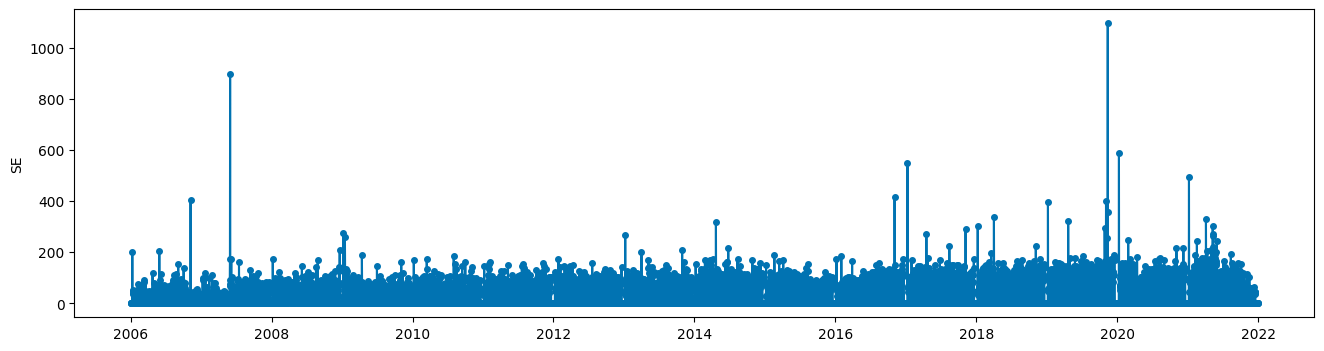

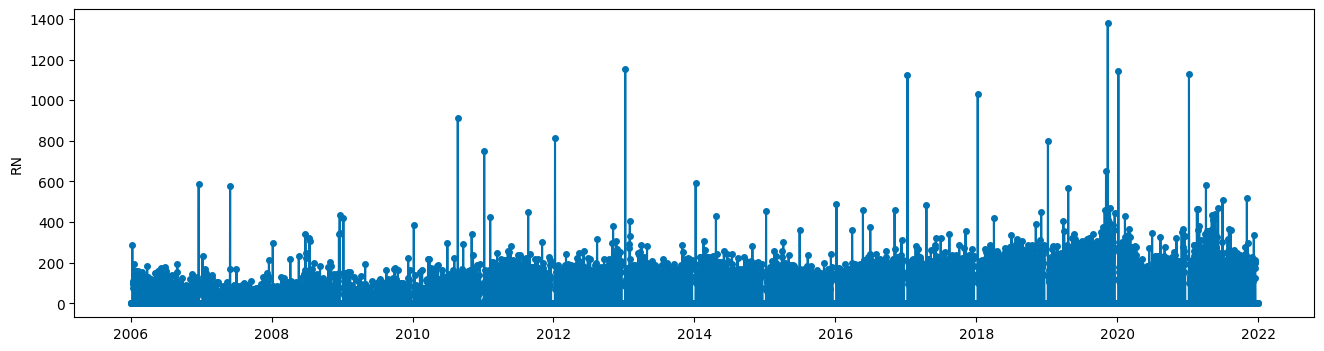

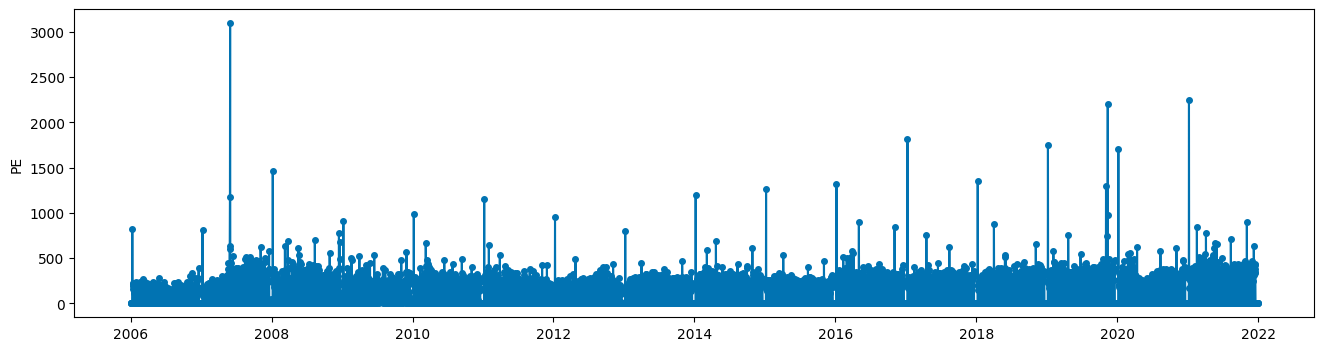

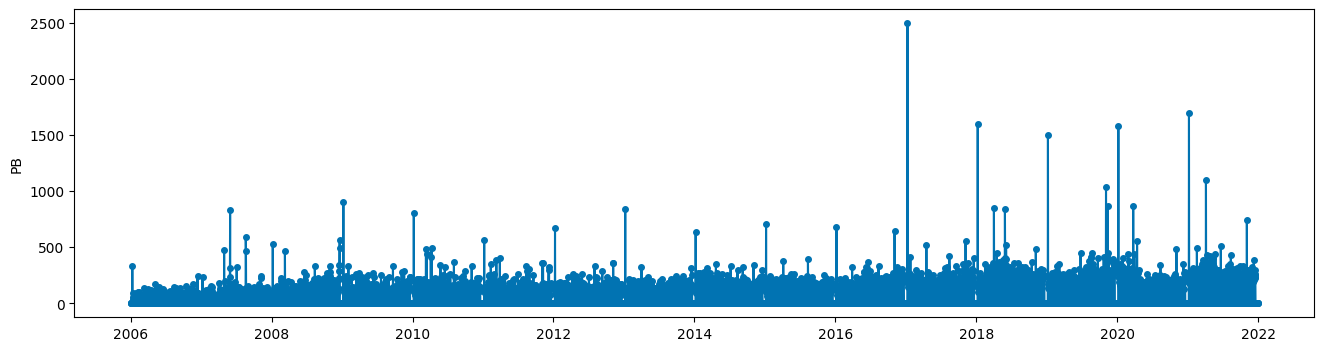

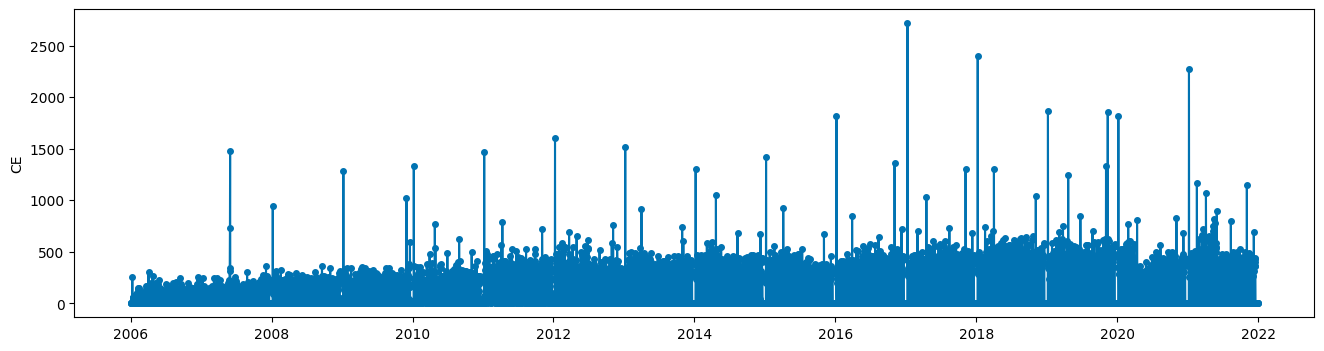

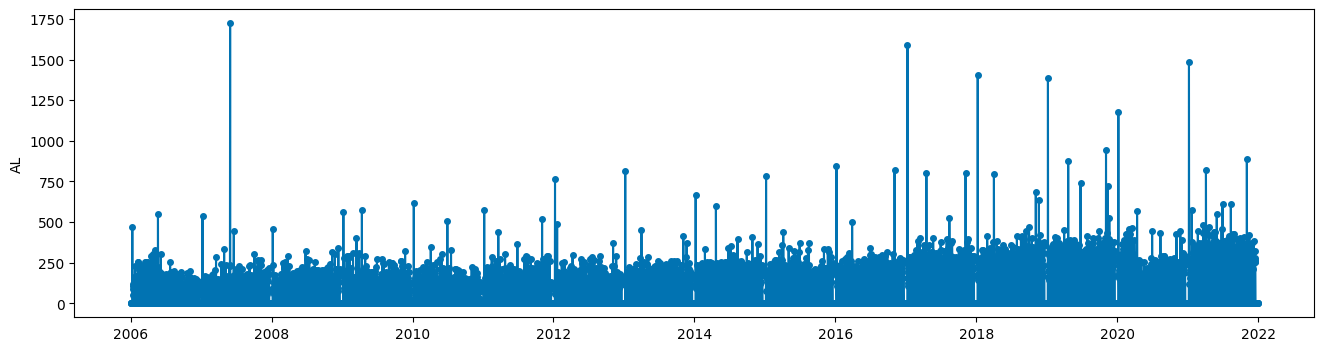

In [5]:
# Let's see the data

import matplotlib.pyplot as plt

for col in df.columns:
    sktime.utils.plotting.plot_series(df[col])

plt.show()

In [6]:
# The daily data appears to be noisy, making it difficult to analyze trends.
# To reduce noise and better visualize trends, we will aggregate the data by month.

# Resample the DataFrame to monthly frequency and sum the values within each month.
# 'ME' stands for month-end, meaning the data will be grouped by the end of each month.
# df.resample('ME').sum() performs the resampling and aggregation.
df_monthly = df.resample('ME').sum()

# Display the resampled DataFrame to inspect the monthly aggregated data.
df_monthly

SE      RN      PE      PB      CE      AL
2006-01-31   658.0  2171.0  3508.0  1299.0  1203.0  2268.0
2006-02-28   849.0  1849.0  2260.0  1254.0  1639.0  2872.0
2006-03-31  1056.0  1840.0  3270.0  1682.0  1991.0  3610.0
2006-04-30   667.0  1254.0  2060.0  1199.0  2058.0  3060.0
2006-05-31  1064.0  2099.0  3090.0  1710.0  2902.0  3169.0
...            ...     ...     ...     ...     ...     ...
2021-08-31  2383.0  4438.0  7259.0  4860.0  8022.0  6821.0
2021-09-30  2129.0  3818.0  7096.0  4915.0  8046.0  6176.0
2021-10-31  1446.0  3742.0  6548.0  4524.0  7070.0  5539.0
2021-11-30   893.0  3882.0  7182.0  5166.0  7526.0  6077.0
2021-12-31   520.0  2111.0  4388.0  3039.0  4667.0  3333.0

[192 rows x 6 columns]

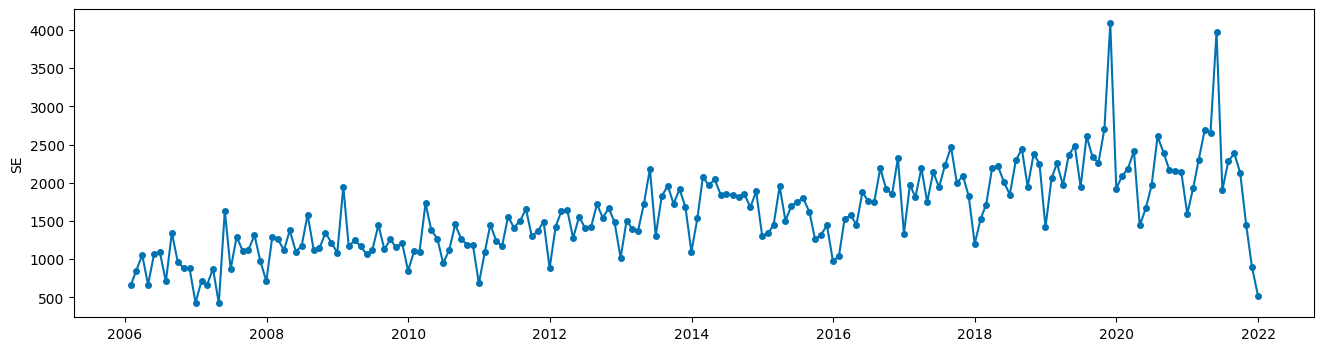

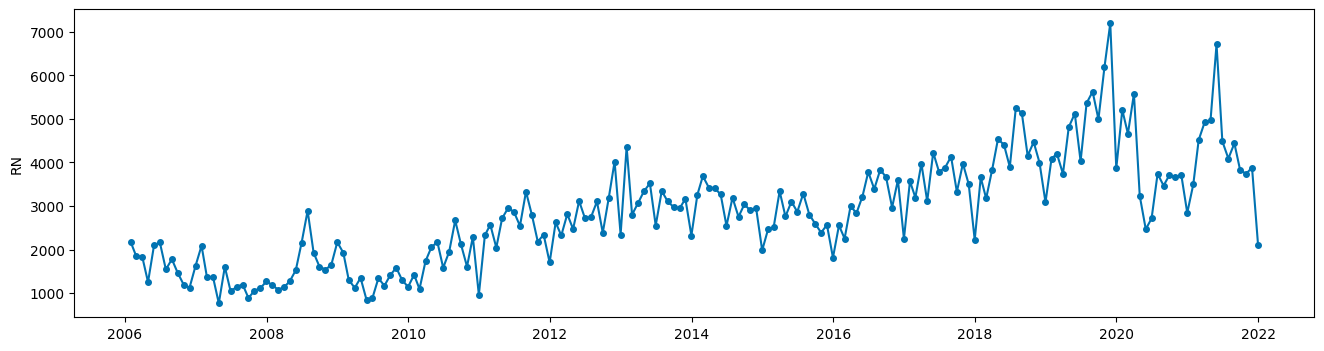

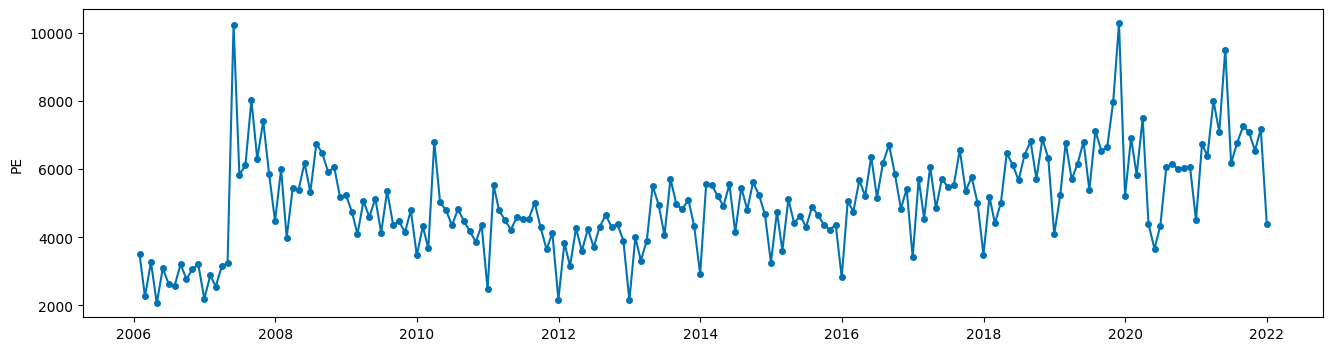

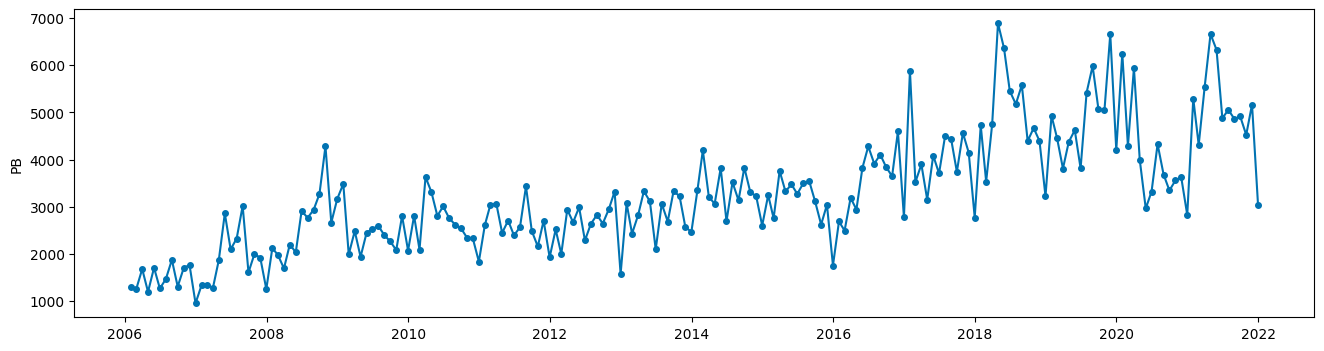

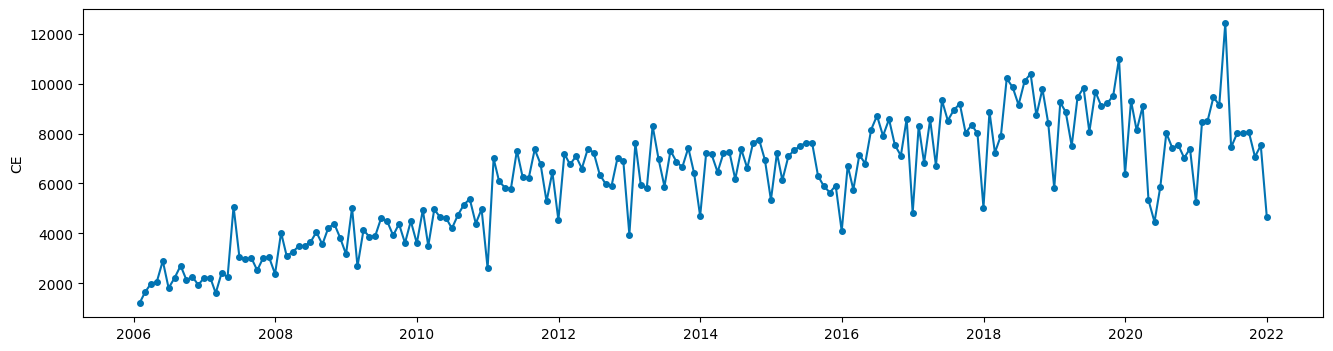

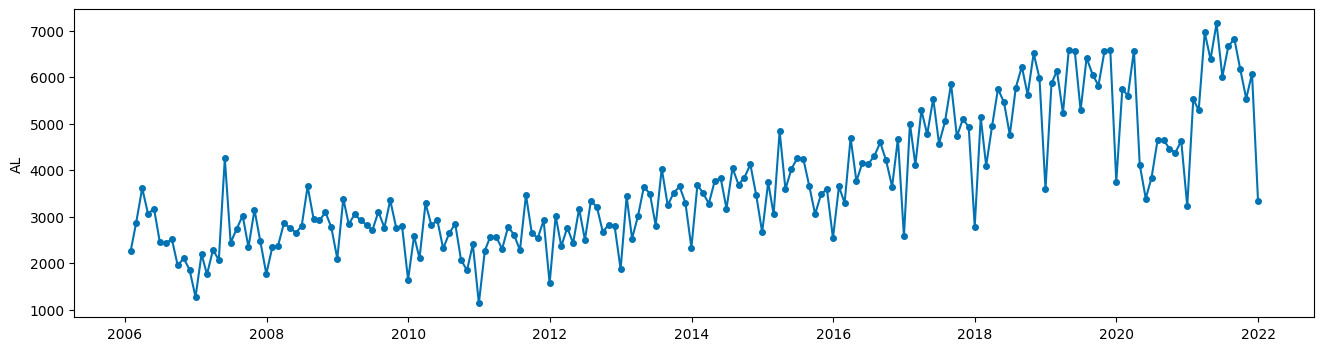

In [7]:
for col in df.columns:
    sktime.utils.plotting.plot_series(df_monthly[col])

plt.show()


In [8]:
# The daily data appears to be noisy, making it difficult to analyze long-term trends.
# To reduce noise and better visualize long-term trends, we will aggregate the data by year.

# Resample the DataFrame to yearly frequency and sum the values within each year.
# 'Y' stands for year-end, meaning the data will be grouped by the end of each year.
# df.resample('Y').sum() performs the resampling and aggregation.
df_yearly = df.resample('Y').sum()

# Display the resampled DataFrame to inspect the yearly aggregated data.
df_yearly

/tmp/ipykernel_36017/107806926.py:7: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df_yearly = df.resample('Y').sum()


SE       RN       PE       PB        CE       AL
2006-12-31  10603.0  20112.0  33829.0  17501.0   25101.0  29543.0
2007-12-31  11712.0  14912.0  66118.0  22936.0   33597.0  30462.0
2008-12-31  14818.0  20151.0  67944.0  32047.0   44234.0  33236.0
2009-12-31  14778.0  15393.0  54365.0  29107.0   48745.0  34126.0
2010-12-31  14434.0  21662.0  53134.0  32106.0   54123.0  28948.0
2011-12-31  16127.0  30388.0  51973.0  31552.0   74903.0  30493.0
2012-12-31  17779.0  33856.0  46494.0  31375.0   78378.0  32937.0
2013-12-31  19697.0  37497.0  53609.0  34219.0   79896.0  38976.0
2014-12-31  21688.0  36400.0  59988.0  39954.0   83114.0  43054.0
2015-12-31  18114.0  32511.0  52158.0  37413.0   78382.0  44051.0
2016-12-31  20607.0  37340.0  64695.0  42307.0   87837.0  47685.0
2017-12-31  23620.0  42901.0  64134.0  48414.0   95798.0  57713.0
2018-12-31  24241.0  49592.0  69158.0  59138.0  106449.0  63845.0
2019-12-31  28994.0  59204.0  79883.0  58389.0  107834.0  70837.0
2020-12-31  24816.0  44995.0  67498.0  48126.0   84856.0  55243.0
2021-12-31  25121.0  51180.0  83182.0  60569.0   98749.0  71940.0

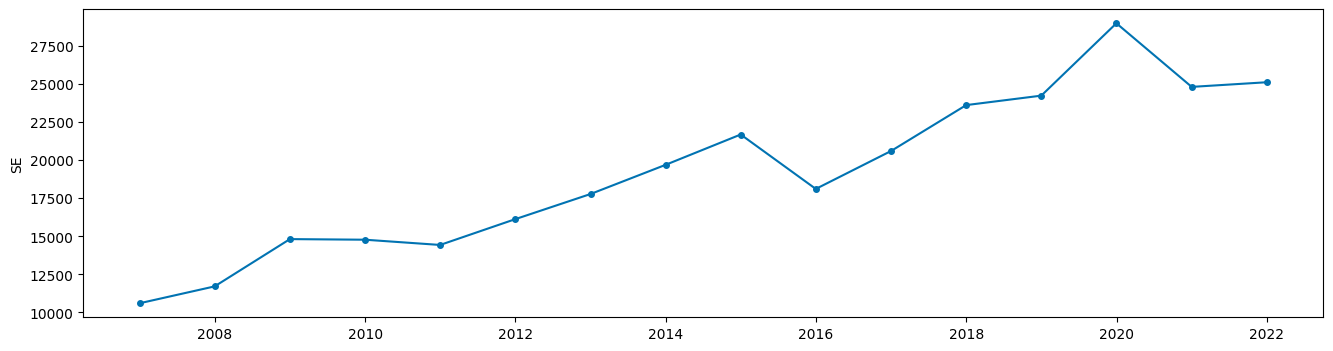

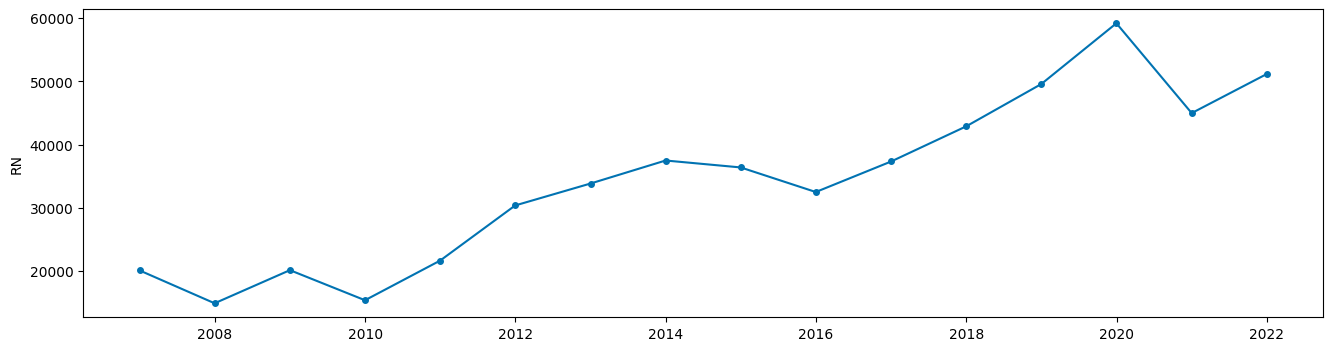

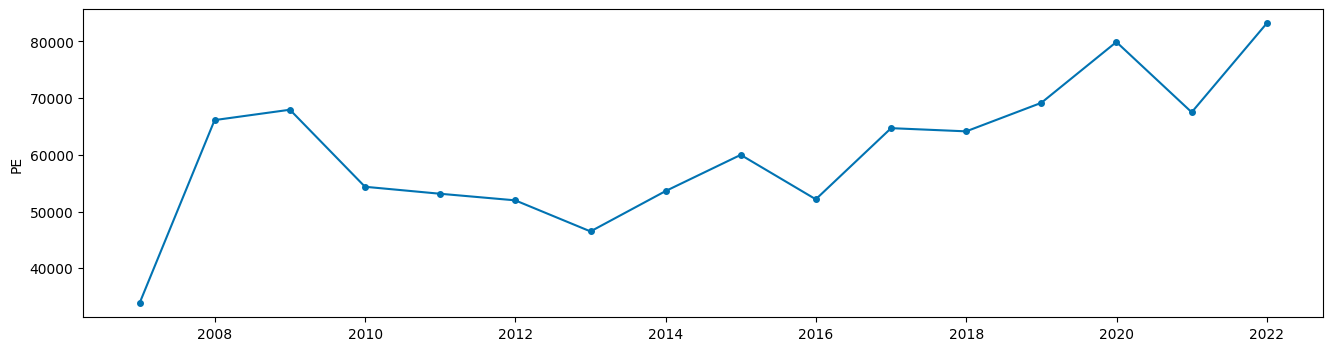

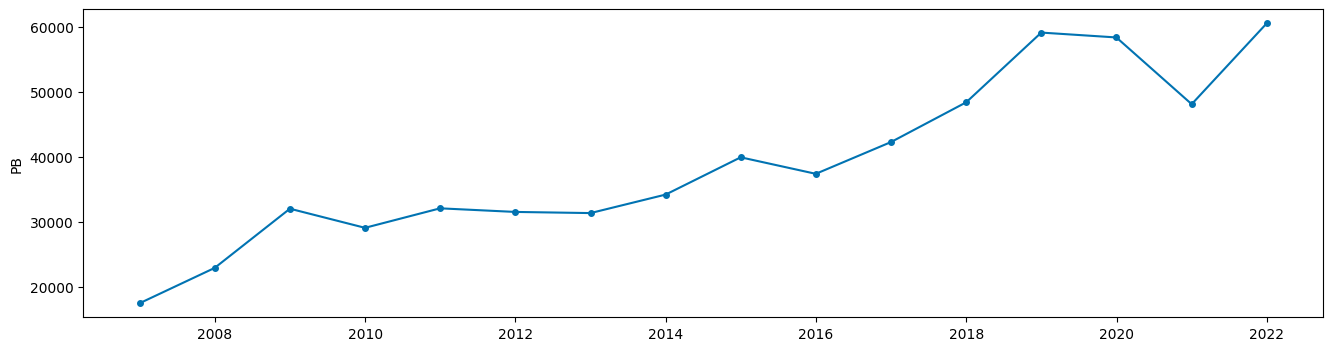

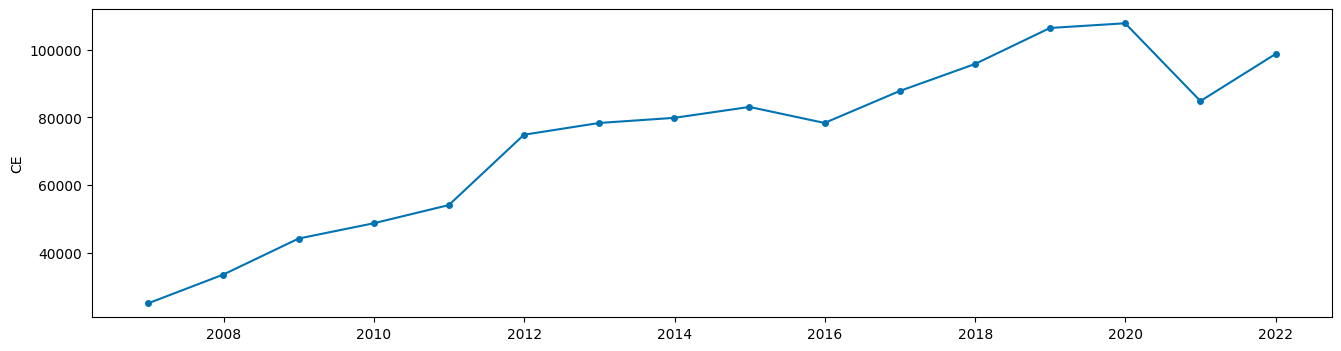

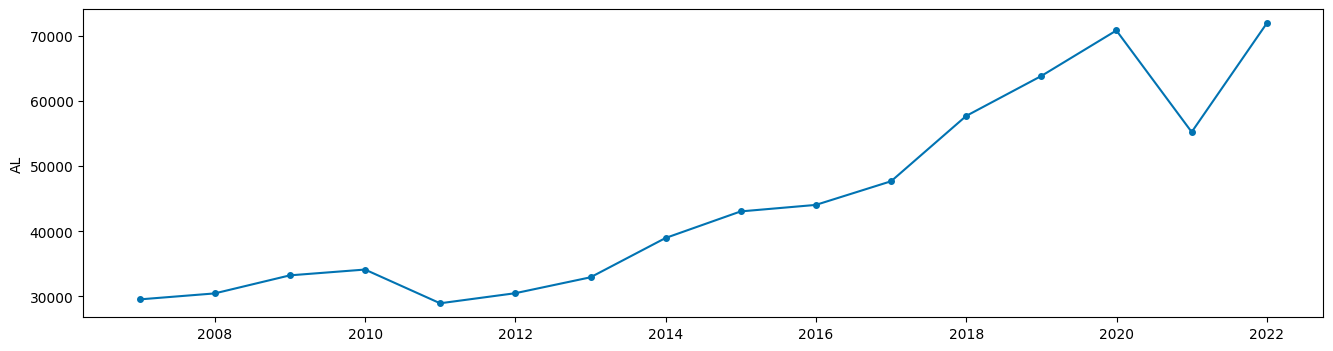

In [9]:
for col in df_yearly.columns:
    sktime.utils.plotting.plot_series(df_yearly[col])

plt.show()


In [10]:
# Add a 'year' column to the DataFrame based on the index
# This extracts the year from the datetime index for easier grouping and analysis
df_monthly['year'] = df_monthly.index.year

# Melt the DataFrame to have 'year', 'state', and 'value' columns
# This restructures the data from wide to long format, which is often preferred for visualization
df_melted = df_monthly.melt(id_vars=['year'], var_name='state', value_name='value')

# Create a box plot using Plotly Express with each state as a different color
# This visualizes the distribution of monthly cases for each state across years
fig = px.box(df_melted, x='year', y='value', color='state', title='Box Plot of Monthly Cases by State')

# Keep only RN on by default
# This improves initial plot readability by showing only one state, allowing users to add others as needed
for i, trace in enumerate(fig.data):
    if trace.name != 'RN':
        fig.data[i].visible = 'legendonly'

# Remove year column
# This cleans up the DataFrame by removing the temporary 'year' column we added earlier
df_monthly.drop(columns='year', inplace=True)

# Show the plot with a legend
# This displays the interactive plot in the notebook or output environment
fig.show()

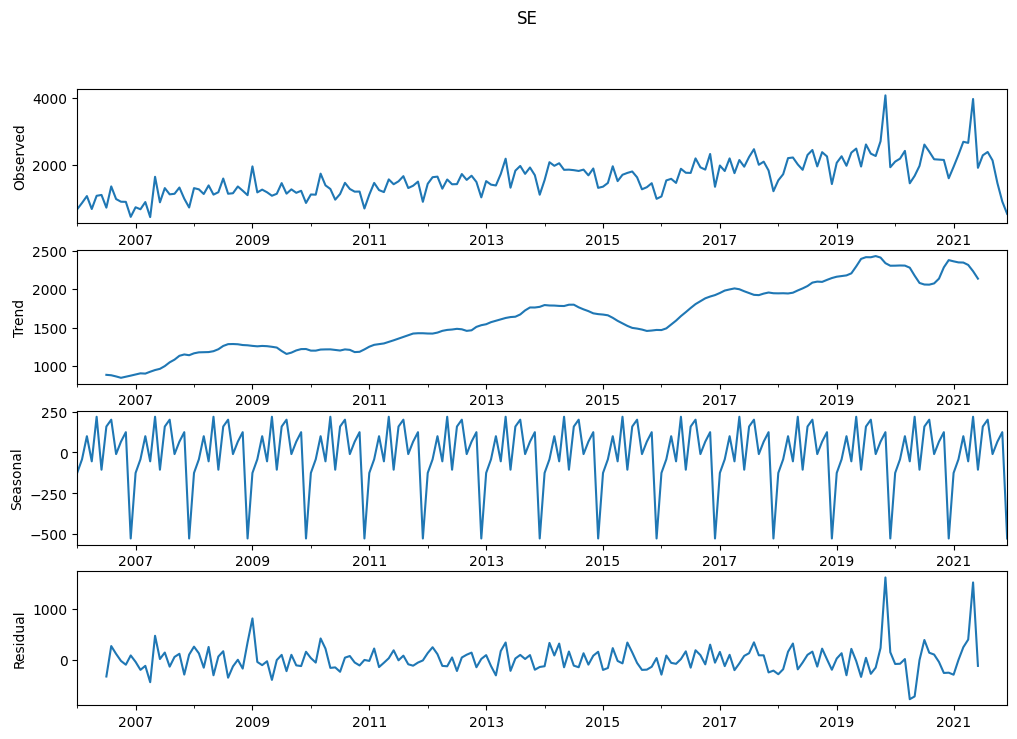

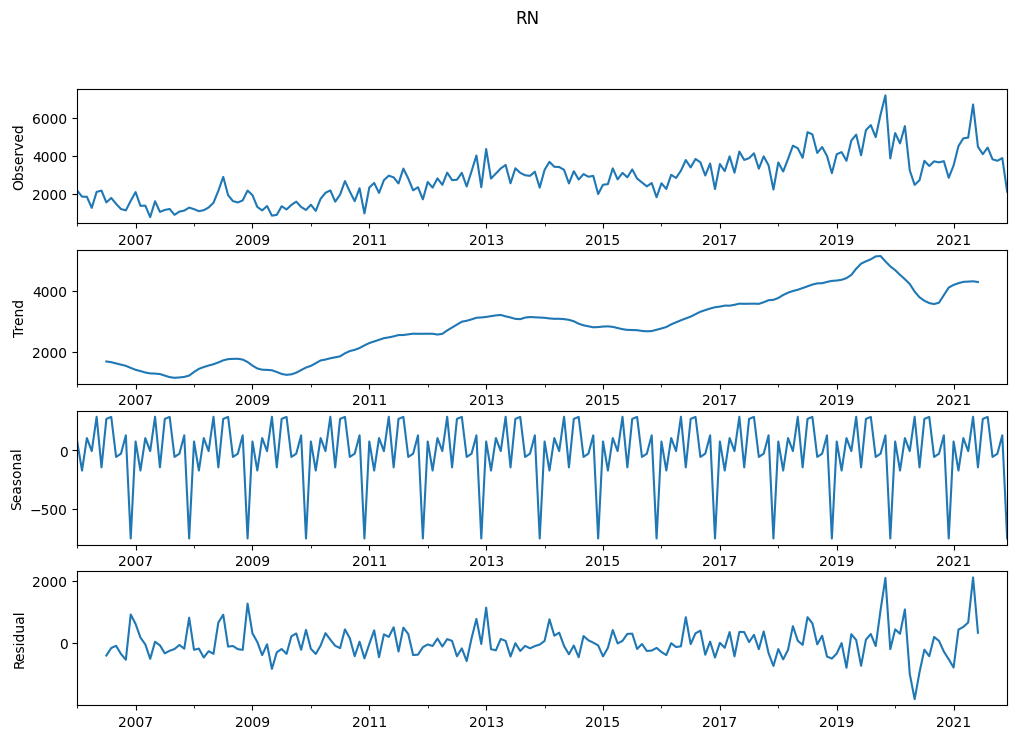

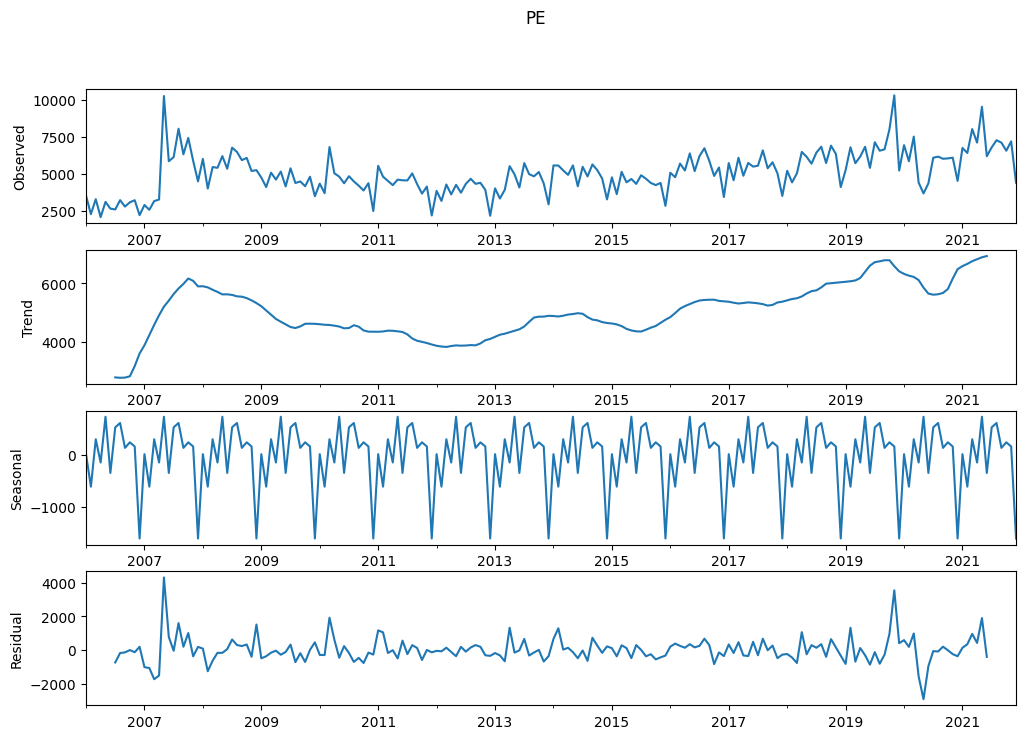

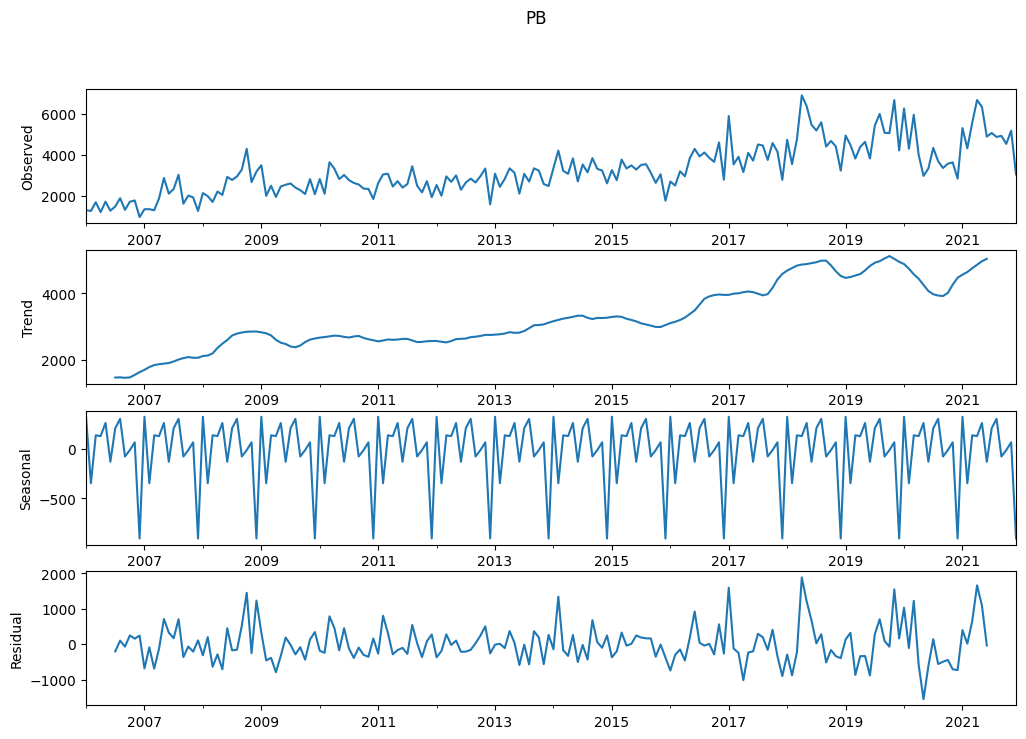

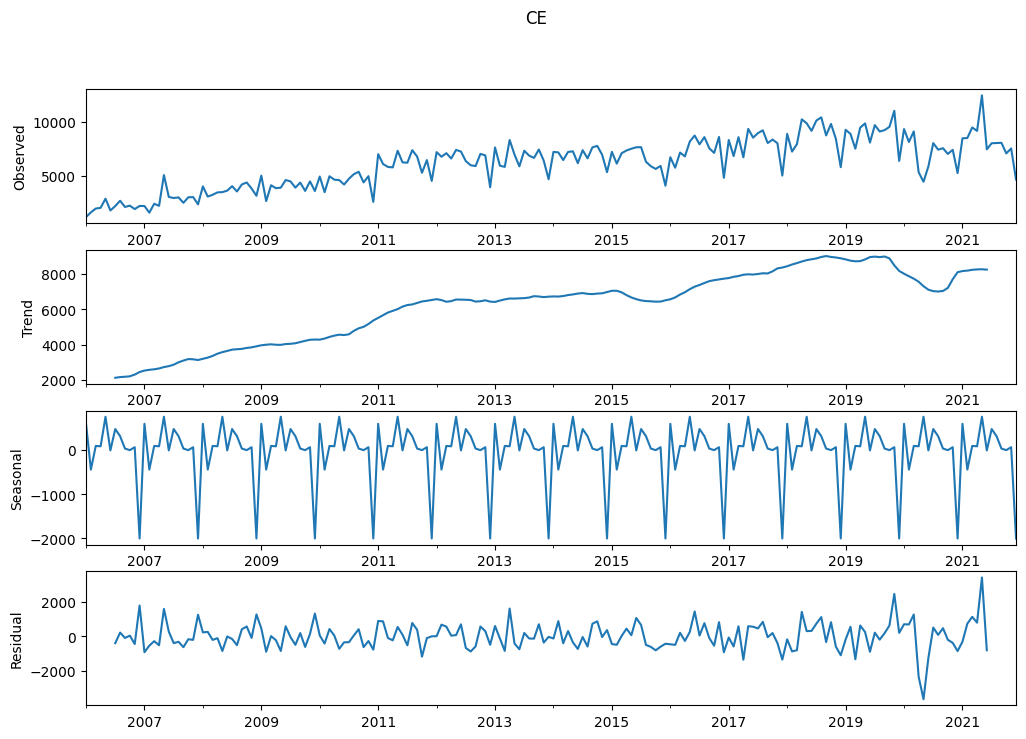

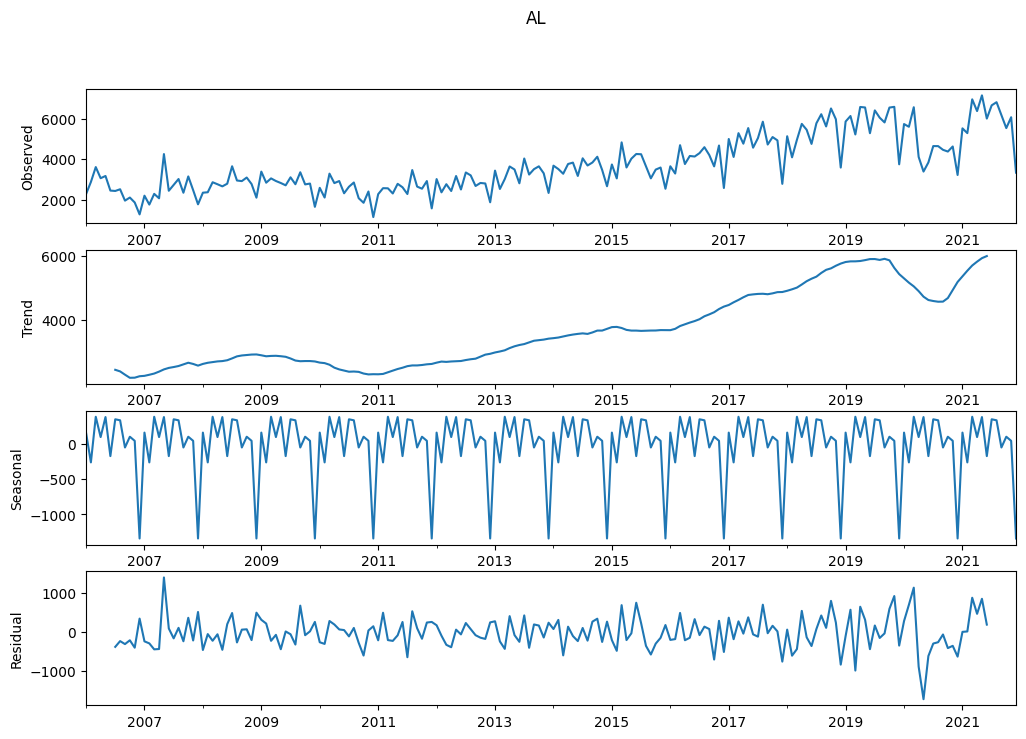

In [11]:
# Function to decompose a time series into trend, seasonal, and residual components
def decompose_series(series):
    # Use seasonal_decompose with additive model and 12-month period (assuming monthly data)
    result = seasonal_decompose(series, model='additive', period=12)
    return result.trend, result.seasonal, result.resid

# Dictionary to store decomposed components for each series
decomposed_series = {}

# Iterate through each column in the monthly dataframe
for column in df_monthly.columns:
    # Decompose each series and store the results
    decomposed_series[column] = decompose_series(df_monthly[column])

# Function to plot the decomposed components
def plot_decomposition(result, title):
    # Create a figure with 4 subplots
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 8))
    
    # Plot observed data
    result.observed.plot(ax=ax1)
    ax1.set_ylabel('Observed')
    
    # Plot trend component
    result.trend.plot(ax=ax2)
    ax2.set_ylabel('Trend')
    
    # Plot seasonal component
    result.seasonal.plot(ax=ax3)
    ax3.set_ylabel('Seasonal')
    
    # Plot residual component
    result.resid.plot(ax=ax4)
    ax4.set_ylabel('Residual')
    
    # Set overall title and display the plot
    plt.suptitle(title)
    plt.show()

# Iterate through each decomposed series
for column in decomposed_series:
    # Extract trend, seasonal, and residual components
    trend, seasonal, resid = decomposed_series[column]
    
    # Perform seasonal decomposition again (this step seems redundant, consider removing)
    result = seasonal_decompose(df_monthly[column], model='additive', period=12) 
    
    # Plot the decomposition for each series
    plot_decomposition(result, column)

`Let's focus on the number of cases in Rio Grande do Norte for now.`

### Interpreting Time Series Decomposition

Understanding the decomposition of time series data into its constituent components is crucial for effective analysis and forecasting. The primary components of interest are **observed**, **trend**, **seasonal**, and **residual**. This detailed breakdown will help you interpret the fundamental patterns and variations in the data more effectively.


#### 1. Observed

The **observed** component represents the original time series data, showing the raw values over a specified period—in this case, from 2006 to 2021.

- **Purpose:** To provide a baseline for analysis by visualizing the actual data points over time.
- **Analogy:** Think of the observed data as a movie reel, where each frame represents the state of the system at a specific point in time.


#### 2. Trend

The **trend** component captures the long-term progression in the time series data, helping identify whether the series is increasing, decreasing, or stable over time.

- **Characteristics:**
- Represents long-term changes in the dataset.
- Exhibits periods of growth, decline, or stability.
- **Example Analysis:**
- A general upward trend can be seen from 2006 to 2021.
- Periods such as 2010-2012 and 2014-2016 show slower growth or stability.
- Accelerated growth is evident leading up to 2019.
- A noticeable dip around 2020, likely due to COVID-19, followed by a recovery in 2021.

> **Key Insight:** Significant events, such as economic downturns or pandemics, can cause abrupt changes in the trend.


#### 3. Seasonal

The **seasonal** component highlights repeating patterns or cycles within the time series that occur at a fixed frequency, such as annually, quarterly, or monthly.

- **Characteristics:**
- Regular intervals with consistent peaks and troughs.
- Indicates strong seasonality if the pattern repeats systematically.
- **Example Analysis:**
- The series shows a significant seasonal effect with a yearly cycle.
- Consistent peaks around the same time each year suggest an external influence.
- For instance, Article 220 of the Brazilian Civil Procedure Code states: *Art. 220. Suspende-se o curso do prazo processual nos dias compreendidos entre 20 de dezembro e 20 de janeiro, inclusive.*

> **Important Consideration:** Seasonality helps in understanding predictable fluctuations influenced by external cyclical factors.


#### 4. Residual

The **residual** component accounts for the remaining variation in the time series after removing the trend and seasonal components. It represents irregular, random fluctuations that are not explained by these components.

- **Characteristics:**
- Should ideally appear as white noise—random fluctuations with no discernible pattern.
- Helps evaluate if the trend and seasonal components adequately capture the fundamental structure of the data.
- **Example Analysis:**
- Residuals should be centered around zero and display no clear trends or periodic structures.
- Any visible patterns in the residuals may indicate unmodeled effects or noise within the data.
- While some noticeable spikes in the residuals indicate periods of higher unexplained variability, a perfect model would aim to minimize these.

> **Model Evaluation:** Persistent patterns in the residuals suggest the need for further model refinement to account for unexplained variability.

## Concerns of Forecasting

Forecasting is a critical aspect of many fields, such as finance, economics, and climate science. It's essential to clarify your objectives and thoroughly understand the specifics of your predictive modeling problem. Using the Socratic method can be highly beneficial in this context. Here are some fundamental considerations and questions to guide you through the process:

### Key Considerations

1. **Data Availability**
- **Question:** How much data do you have available and can you gather it all together?
- **Detail:** More data generally provides better opportunities for exploratory data analysis, model testing, tuning, and improving model fidelity. Extensive datasets enhance the robustness of forecasts.

2. **Prediction Time Horizon**
- **Question:** What is the time horizon for the predictions—short, medium, or long term?
- **Detail:** Shorter time horizons are typically easier to predict with higher accuracy. Longer-term forecasts often come with greater uncertainty.

3. **Update Frequency**
- **Question:** Can forecasts be updated frequently over time, or must they remain static once made?
- **Detail:** Continuously updating forecasts with new information usually results in more precise and reliable predictions. Static forecasts may become outdated if conditions change.

4. **Temporal Frequency**
- **Question:** At what temporal frequency are forecasts required?
- **Detail:** Determining whether forecasts are needed daily, weekly, monthly, etc., allows for better alignment with the data's granularity. This also enables the use of down-sampling or up-sampling techniques to optimize model performance.


### Data Preparation and Challenges

Time series data often necessitates extensive preparation before it can be effectively used in forecasting models. Here are some common issues and steps for addressing them:

1. **Frequency Issues**
- **Detail:** Data may be provided at an inappropriate frequency—either too high or too low—or may be unevenly spaced over time. Resampling can standardize the frequency, making the data suitable for modeling.

2. **Handling Outliers**
- **Detail:** Detecting and managing outliers is crucial, as they can skew the results. These could be corrupted values or extreme anomalies that need special handling.

3. **Missing Data**
- **Detail:** Gaps or missing entries in the dataset need to be interpolated or imputed. Missing data can distort the analysis unless properly addressed.

## Time Series as Supervised Learning

Time series forecasting can be effectively framed as a supervised learning problem. This re-framing allows the utilization of a suite of standard linear and nonlinear machine learning algorithms on time series datasets. In this explanation, we will cover how to transform your time series problem into a supervised learning problem, emphasizing key techniques and relevant considerations.

### Key Concepts

1. **Supervised Learning:**
- **Definition:** Supervised learning involves training a model on a labeled dataset, where each training example consists of input-output pairs.
- **Importance:** It is the foundation for predictive modeling with machine learning algorithms.

2. **Lagged Observations:**
- **Definition:** Lagged observations are past values of a time series that can be used to predict future values.
- **Significance:** They capture the temporal dependencies in the data, enabling the model to learn from historical patterns.

Given a sequence of numbers in a time series dataset, we can restructure the data for supervised learning by lagging the observations. This process involves creating input-output pairs where the input is a sequence of observations at prior time steps, and the output is the observation at the next time step.

### Important Observations

1. **Order Preservation:**
- The order between observations must be preserved to maintain the temporal sequence necessary for accurate predictions.

2. **Handling Missing Values:**
- The first row contains `nan` because there is no previous value to predict the initial step; it should be deleted during model training.
- Similarly, the last value may lack a known next step, which also might need deletion or appropriate handling during training.


### Applications of Sliding Window Method

1. **Regression and Classification:**
- **Regression:** Applicable when predicting real-valued time series.
- **Classification:** Useful if the time series values are categorical labels.

2. **Multivariate Time Series:**
- This approach can be extended to multivariate time series, where multiple features at previous time steps are used to predict multiple targets.

3. **Flexibility in Model Choice:**
- Once the time series is framed as a supervised learning problem, a variety of machine learning algorithms—both linear and nonlinear—can be applied, provided the temporal order is maintained.


Transforming time series data into a supervised learning problem through the sliding window method provides a robust framework for applying various machine learning algorithms. By understanding and implementing these concepts, you can develop more accurate and sophisticated models for time series forecasting.

In [12]:
df_monthly


SE      RN      PE      PB      CE      AL
2006-01-31   658.0  2171.0  3508.0  1299.0  1203.0  2268.0
2006-02-28   849.0  1849.0  2260.0  1254.0  1639.0  2872.0
2006-03-31  1056.0  1840.0  3270.0  1682.0  1991.0  3610.0
2006-04-30   667.0  1254.0  2060.0  1199.0  2058.0  3060.0
2006-05-31  1064.0  2099.0  3090.0  1710.0  2902.0  3169.0
...            ...     ...     ...     ...     ...     ...
2021-08-31  2383.0  4438.0  7259.0  4860.0  8022.0  6821.0
2021-09-30  2129.0  3818.0  7096.0  4915.0  8046.0  6176.0
2021-10-31  1446.0  3742.0  6548.0  4524.0  7070.0  5539.0
2021-11-30   893.0  3882.0  7182.0  5166.0  7526.0  6077.0
2021-12-31   520.0  2111.0  4388.0  3039.0  4667.0  3333.0

[192 rows x 6 columns]

In [13]:
df_monthly_train = df_monthly[df_monthly.index <= '2017-12-31']
df_monthly_test = df_monthly[df_monthly.index == '2018-01-31']

df_monthly_train

SE      RN      PE      PB      CE      AL
2006-01-31   658.0  2171.0  3508.0  1299.0  1203.0  2268.0
2006-02-28   849.0  1849.0  2260.0  1254.0  1639.0  2872.0
2006-03-31  1056.0  1840.0  3270.0  1682.0  1991.0  3610.0
2006-04-30   667.0  1254.0  2060.0  1199.0  2058.0  3060.0
2006-05-31  1064.0  2099.0  3090.0  1710.0  2902.0  3169.0
...            ...     ...     ...     ...     ...     ...
2017-08-31  2467.0  4134.0  6571.0  4444.0  9195.0  5856.0
2017-09-30  1997.0  3324.0  5361.0  3741.0  8024.0  4726.0
2017-10-31  2092.0  3975.0  5765.0  4565.0  8346.0  5096.0
2017-11-30  1826.0  3502.0  5022.0  4149.0  8005.0  4931.0
2017-12-31  1202.0  2222.0  3490.0  2773.0  5030.0  2780.0

[144 rows x 6 columns]

In [14]:
df_monthly_test

SE      RN      PE      PB      CE      AL
2018-01-31  1530.0  3655.0  5193.0  4724.0  8870.0  5135.0

### Converting Time Series Forecasting into Supervised Learning with Lag Features

Lag features are a powerful and traditional method used to transform time series forecasting problems into supervised learning tasks. The fundamental strategy involves predicting the value at the next time step (t+1) by leveraging the value at the current time step (t).

#### Creating Lagged Features

To create these lagged features, we utilize the `shift()` function in Pandas. This function is designed to manipulate time series data by shifting values either forward or backward along the specified axis.

Here's a step-by-step breakdown:

1. **Original Time Series Data**: Start with a time series dataset where each row represents a consecutive time step.

2. **Applying the `shift()` Function**:
- By shifting the dataset by one position backward, you generate what is known as the "lagged" version of the dataset. This effectively moves each value to the previous row.
- This operation creates a new column (let's call it the t column) which holds the original values shifted down by one position.

3. **Handling Missing Values**:
- The first row of the lagged column will have a NaN (Not a Number) because there is no previous value available for the initial time step.
- The unshifted column still represents the original sequence of data points (the t+1 column), which the model will attempt to predict.

In [15]:
# Create lag features for the training data

# Concatenate the original dataframe with its shifted version
# The shift(1) creates a lag of 1 month for all columns
df_monthly_train_lagged = pd.concat([df_monthly_train.shift(1), df_monthly_train], axis=1)

# Rename columns to indicate time periods
# '_t-1' suffix for lagged features (previous month)
# '_t' suffix for current features
df_monthly_train_lagged.columns = [f'{col}_t-1' for col in df_monthly_train.columns] + \
                                   [f'{col}_t' for col in df_monthly_train.columns]

# Display the resulting dataframe with lagged features
df_monthly_train_lagged

# Note: This creates a new dataframe where each row contains both the current month's data
# and the previous month's data, allowing for time series analysis and forecasting

SE_t-1  RN_t-1  PE_t-1  PB_t-1  CE_t-1  AL_t-1    SE_t    RN_t  \
2006-01-31     NaN     NaN     NaN     NaN     NaN     NaN   658.0  2171.0   
2006-02-28   658.0  2171.0  3508.0  1299.0  1203.0  2268.0   849.0  1849.0   
2006-03-31   849.0  1849.0  2260.0  1254.0  1639.0  2872.0  1056.0  1840.0   
2006-04-30  1056.0  1840.0  3270.0  1682.0  1991.0  3610.0   667.0  1254.0   
2006-05-31   667.0  1254.0  2060.0  1199.0  2058.0  3060.0  1064.0  2099.0   
...            ...     ...     ...     ...     ...     ...     ...     ...   
2017-08-31  2233.0  3880.0  5534.0  4494.0  8941.0  5046.0  2467.0  4134.0   
2017-09-30  2467.0  4134.0  6571.0  4444.0  9195.0  5856.0  1997.0  3324.0   
2017-10-31  1997.0  3324.0  5361.0  3741.0  8024.0  4726.0  2092.0  3975.0   
2017-11-30  2092.0  3975.0  5765.0  4565.0  8346.0  5096.0  1826.0  3502.0   
2017-12-31  1826.0  3502.0  5022.0  4149.0  8005.0  4931.0  1202.0  2222.0   

              PE_t    PB_t    CE_t    AL_t  
2006-01-31  3508.0  1299.0  1203.0  2268.0  
2006-02-28  2260.0  1254.0  1639.0  2872.0  
2006-03-31  3270.0  1682.0  1991.0  3610.0  
2006-04-30  2060.0  1199.0  2058.0  3060.0  
2006-05-31  3090.0  1710.0  2902.0  3169.0  
...            ...     ...     ...     ...  
2017-08-31  6571.0  4444.0  9195.0  5856.0  
2017-09-30  5361.0  3741.0  8024.0  4726.0  
2017-10-31  5765.0  4565.0  8346.0  5096.0  
2017-11-30  5022.0  4149.0  8005.0  4931.0  
2017-12-31  3490.0  2773.0  5030.0  2780.0  

[144 rows x 12 columns]

In [16]:
df_monthly_train_lagged.dropna(inplace=True)
df_monthly_train_lagged

SE_t-1  RN_t-1  PE_t-1  PB_t-1  CE_t-1  AL_t-1    SE_t    RN_t  \
2006-02-28   658.0  2171.0  3508.0  1299.0  1203.0  2268.0   849.0  1849.0   
2006-03-31   849.0  1849.0  2260.0  1254.0  1639.0  2872.0  1056.0  1840.0   
2006-04-30  1056.0  1840.0  3270.0  1682.0  1991.0  3610.0   667.0  1254.0   
2006-05-31   667.0  1254.0  2060.0  1199.0  2058.0  3060.0  1064.0  2099.0   
2006-06-30  1064.0  2099.0  3090.0  1710.0  2902.0  3169.0  1090.0  2165.0   
...            ...     ...     ...     ...     ...     ...     ...     ...   
2017-08-31  2233.0  3880.0  5534.0  4494.0  8941.0  5046.0  2467.0  4134.0   
2017-09-30  2467.0  4134.0  6571.0  4444.0  9195.0  5856.0  1997.0  3324.0   
2017-10-31  1997.0  3324.0  5361.0  3741.0  8024.0  4726.0  2092.0  3975.0   
2017-11-30  2092.0  3975.0  5765.0  4565.0  8346.0  5096.0  1826.0  3502.0   
2017-12-31  1826.0  3502.0  5022.0  4149.0  8005.0  4931.0  1202.0  2222.0   

              PE_t    PB_t    CE_t    AL_t  
2006-02-28  2260.0  1254.0  1639.0  2872.0  
2006-03-31  3270.0  1682.0  1991.0  3610.0  
2006-04-30  2060.0  1199.0  2058.0  3060.0  
2006-05-31  3090.0  1710.0  2902.0  3169.0  
2006-06-30  2634.0  1270.0  1814.0  2447.0  
...            ...     ...     ...     ...  
2017-08-31  6571.0  4444.0  9195.0  5856.0  
2017-09-30  5361.0  3741.0  8024.0  4726.0  
2017-10-31  5765.0  4565.0  8346.0  5096.0  
2017-11-30  5022.0  4149.0  8005.0  4931.0  
2017-12-31  3490.0  2773.0  5030.0  2780.0  

[143 rows x 12 columns]

## Autocorrelation

Autocorrelation plots are a fundamental tool in time series analysis used to quantify the strength and type of relationship between observations and their lagged values. In statistics, this relationship is known as correlation, and when it involves time lags, it becomes autocorrelation (or self-correlation).

- **Correlation**: This measures the degree to which two groups of numbers move in relation to each other. A correlation value ranges between -1 and 1.
- A value closer to 1 indicates a strong positive correlation, meaning as one variable increases, the other tends to increase.
- A value closer to -1 indicates a strong negative correlation, implying that as one variable increases, the other tends to decrease.
- A value around zero suggests a weak or no correlation.

- **Autocorrelation**: When correlation is applied to sequential data points with different lags, it is called autocorrelation. This measures the correlation between an observation at a given time and the same observation at a previous time (lag).

### Interpreting the Autocorrelation Coefficient

The correlation values obtained are termed autocorrelation coefficients. These coefficients are calculated for various lags. For instance:
- **Lag 1**: Correlation between observations and their immediate previous values.
- **Lag 2**: Correlation between observations and their values two time periods ago, and so on.

By examining these coefficients over multiple lags, we can understand how past values influence current values.

### Autocorrelation Plots

To visualize these relationships, we use autocorrelation plots. Here’s what to pay attention to:

- **X-Axis**: Represents the lag values.
- **Y-Axis**: Shows the correlation coefficient.
- **Dotted Lines**: Indicate the threshold for statistical significance. If the correlation coefficient surpasses these lines, it signifies a significant correlation.


#### Confidence Intervals and Statistical Significance in Autocorrelation Plots

1. **Dashed Grey Lines**
- These lines typically represent the **99% confidence intervals**. The purpose of these lines is to provide a threshold for determining whether observed autocorrelation values are statistically significant.

2. **Solid Grey Lines**
- These lines represent the **95% confidence intervals**. Autocorrelation values that exceed these lines are considered statistically significant.

**Values within the lines**: Autocorrelation values that lie within these lines are generally considered not statistically significant. This implies that such values are likely due to random noise and do not indicate an basic pattern or relationship in the data.


#### Importance of Autocorrelation Plots

1. **Identifying Seasonality**: Clear cyclical patterns in the plot indicate seasonality within the dataset.
2. **Model Building**: These plots help decide on models that account for autocorrelation, particularly in time series forecasting.
3. **Statistical Significance**: The dotted lines provide a visual cue for determining which lag values have meaningful correlations.

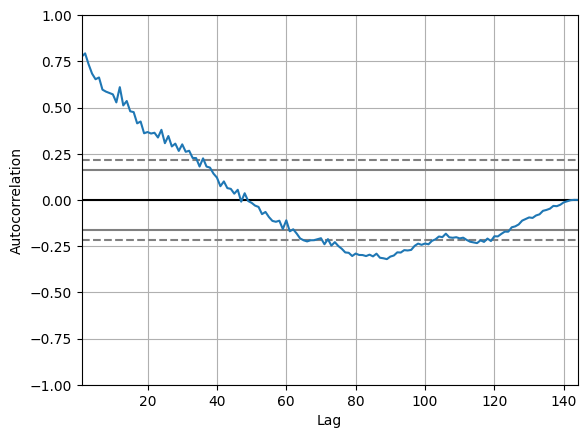

In [17]:
# Plot the autocorrelation of the 'RN' column in the training DataFrame
# Autocorrelation measures the correlation of a time series with its own past values
# This helps in identifying patterns such as seasonality and trends in the data

pd.plotting.autocorrelation_plot(df_monthly_train['RN'])

# Display the plot
plt.show()

> ### Detailed Interpretation of the Autocorrelation Plot for Rio Grande do Norte
>
> Here’s a detailed interpretation of an example plot and its key features:
>
> #### Key Features Explained
>
> 1. **Positive Initial Lag Autocorrelation**
> - At the beginning of the plot, the autocorrelation starts at a high positive value (around 0.75). This indicates a strong positive correlation between the initial values of the series and their lagged counterparts.
>
> 2. **Gradual Decrease**
> - As the lag increases, the autocorrelation values gradually decrease. This implies that the further apart the time points are, the less correlated they become.
>
> 3. **Crossing Zero**
> - Around lag 50, the autocorrelation crosses the zero line, indicating the point beyond which the time series values no longer have significant correlation with their earlier values. This transition is crucial in identifying the decay of memory in the series.
>
> 4. **Negative Correlation**
> - Between lag 75 and lag 125, the plot shows negative autocorrelation, reaching a minimum around lag 100. This suggests that at these lags, the time series values are inversely related to their previous values. Such behavior might indicate periodic fluctuations or cycles within the dataset.
>
> 5. **Increase Towards Zero**
> - After reaching the minimum, the autocorrelation values begin to increase again towards zero by lag 175. This rise back to zero signifies a reduction in the negative correlation and indicates that the time series is losing its cyclical influence over longer lags.
>
>
> #### Key Takeaways
>
> - **Strong Positive Correlation at Small Lags**: Initially, there is a robust positive correlation, indicative of a persistence in the time series values over short periods.
> - **Weakening Correlation Over Time**: As the lag increases, the correlation weakens, signaling diminishing influence of past values on future ones.
> - **Significant Negative Correlation**: There is a notable period (lags 75 to 125) where the series shows significant negative correlation, suggesting inverse relationships at these intervals.
> - **Non-Significant Values Beyond Certain Lags**: Beyond certain lags, the correlations fall within the confidence intervals, implying they are likely insignificant.
>

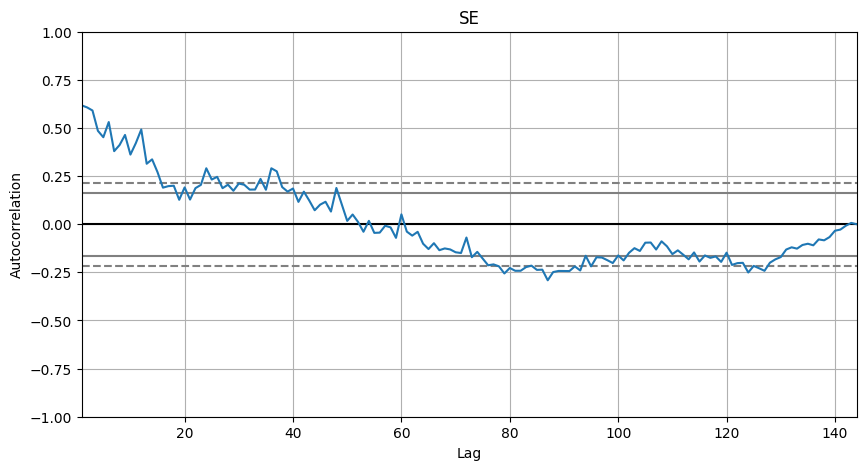

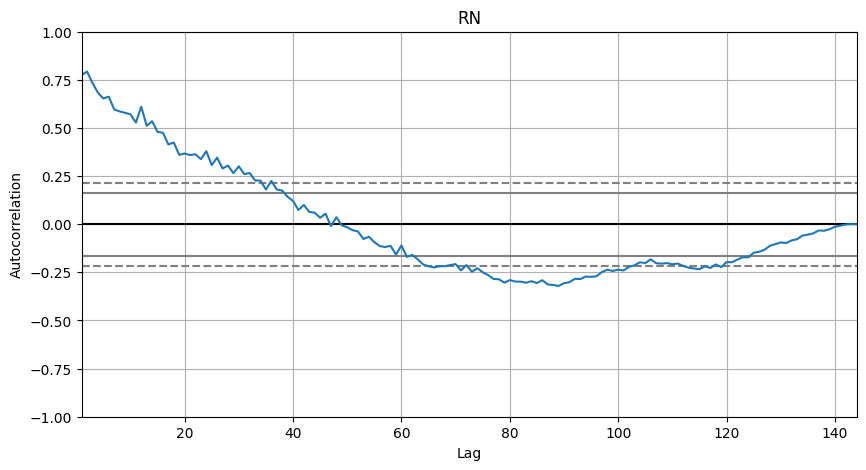

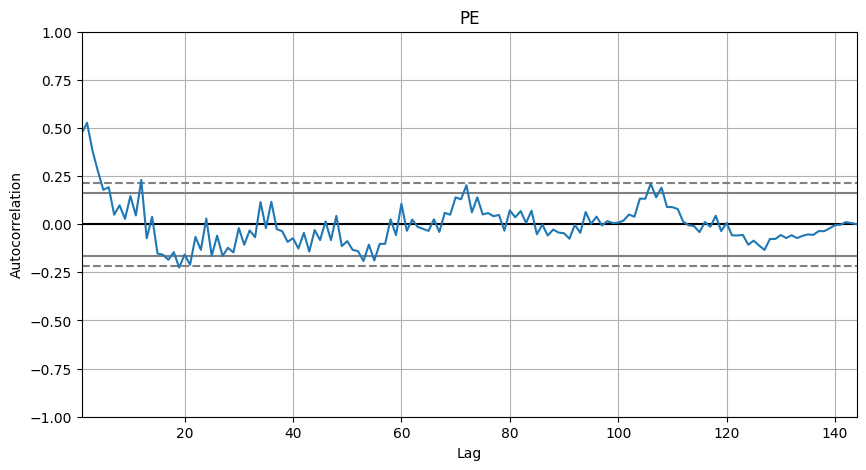

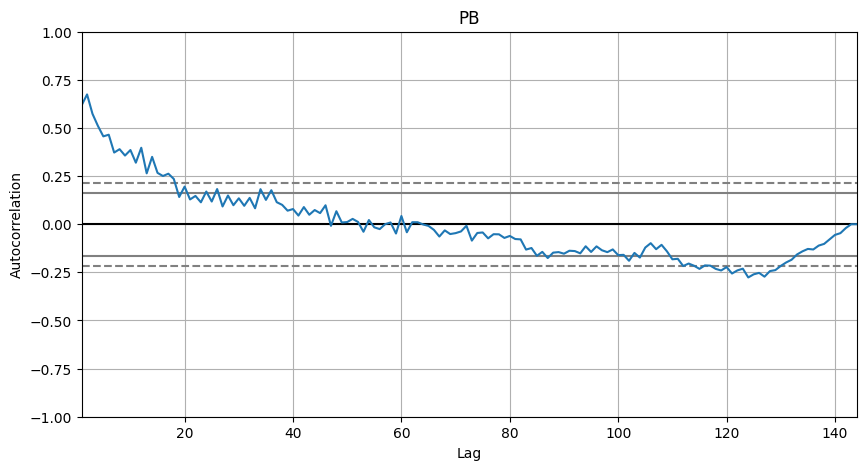

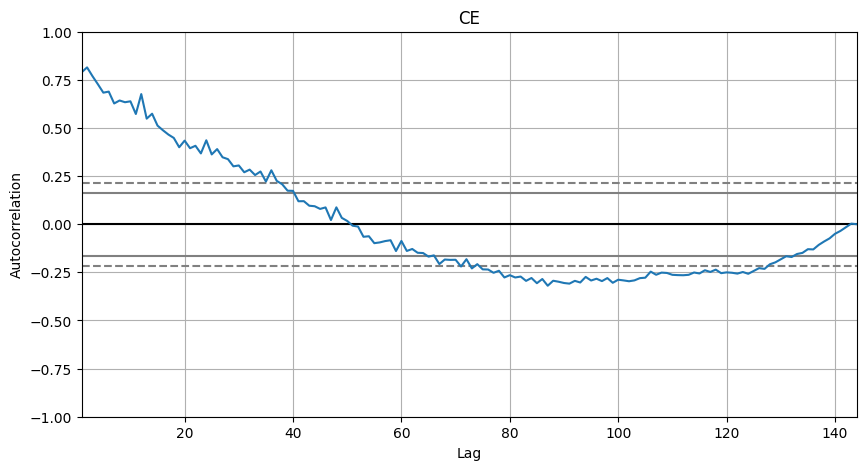

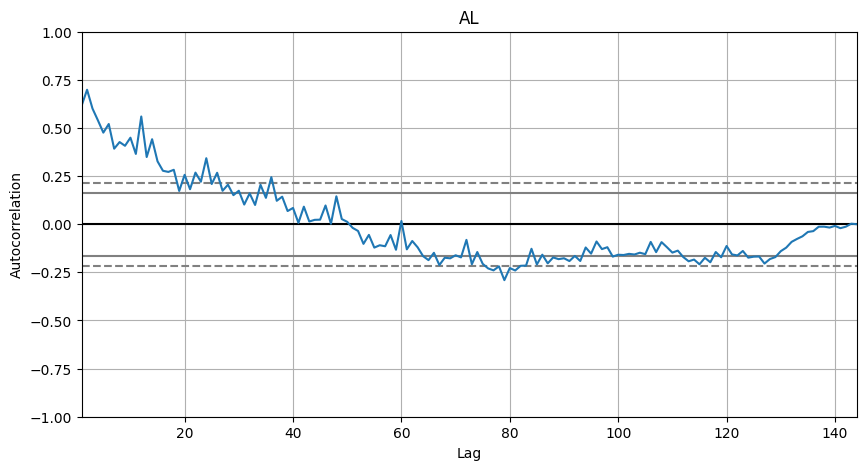

In [18]:
for uf in df_monthly_train.columns:
    # Create figure and plot space
    fig, ax = plt.subplots(figsize=(10, 5))
    pd.plotting.autocorrelation_plot(df_monthly_train[uf])
    plt.title(uf)
    plt.show()

### Predicting Future Values with a Random Forest Regressor

In this class, we will employ a sophisticated yet accessible machine learning model: the Random Forest Regressor. The goal is to forecast the values for the upcoming month using data from the current month.

The key idea here is to use lagged features. By incorporating these delayed data points, our model becomes capable of making informed predictions about future values based on the information available from the present month.

1. **Lagged Features**: These are essentially past observations shifted forward in time. For instance, the value recorded today might be used as a predictive feature for tomorrow's value. In our case, we'll use the current month's data to predict next month's values.

2. **Random Forest Regressor**: This is an ensemble learning method that operates by constructing multiple decision trees during training and outputting the mean prediction of the individual trees. It combines robustness with flexibility, making it a powerful tool for forecasting tasks.

> Please note that our data can be approached like a multivariate time series, where each feature (column) represents a different time series. We can use the signal at `t-1` for all states to predict the value for AL at `t`. We cannot use the signal at `t` for other states to predict the value for AL at `t`, as this would be a violation of the temporal order.

In [19]:

# Create a random forest regressor with parallel jobs and a fixed random state for reproducibility
model = RandomForestRegressor(n_jobs=-1, random_state=271828)

# Select columns that end with '_t-1' to use as features (lagged features)
X_cols = [col for col in df_monthly_train_lagged.columns if col.endswith('_t-1')]

# Define the target column
y_col = 'RN_t'

# Extract feature values (X) and target values (y) from the training DataFrame
X = df_monthly_train_lagged[X_cols].values
y = df_monthly_train_lagged[y_col].values

# Fit the random forest model to the training data
model.fit(X, y)

# We'll use the trained model to predict the first value in the test set
X_test = df_monthly_train.values # Use the original training data to predict the timestep t+1 (test data)
 
# Predict the first value in the test set using the trained model
y_pred = model.predict(X_test[-1].reshape(1, -1))

# Get the true value of the target variable from the test set
true_value = df_monthly_test['RN'].values[0]

# Print the predicted and true values for comparison
print(f'Predicted: {y_pred[0]:.2f}')
print(f'True value: {true_value:.2f}')
print(f'Difference: {y_pred[0] - true_value:.2f}')

Predicted: 2855.16
True value: 3655.00
Difference: -799.84


In [20]:


# Create a MLP regressor with fixed random state for reproducibility
model = MLPRegressor(random_state=271828)

# Select columns that end with '_t-1' to use as features (lagged features)
X_cols = [col for col in df_monthly_train_lagged.columns if col.endswith('_t-1')]

# Define the target column
y_col = 'RN_t'

# Extract feature values (X) and target values (y) from the training DataFrame
X = df_monthly_train_lagged[X_cols].values
y = df_monthly_train_lagged[y_col].values

# Fit the MLP model to the training data
model.fit(X, y)

# We'll use the trained model to predict the first value in the test set
X_test = df_monthly_train.values # Use the original training data to predict the timestep t+1 (test data)
 
# Predict the first value in the test set using the trained model
y_pred = model.predict(X_test[-1].reshape(1, -1))

# Get the true value of the target variable from the test set
true_value = df_monthly_test['RN'].values[0]

# Print the predicted and true values for comparison
print(f'Predicted: {y_pred[0]:.2f}')
print(f'True value: {true_value:.2f}')
print(f'Difference: {y_pred[0] - true_value:.2f}')

Predicted: 2395.24
True value: 3655.00
Difference: -1259.76


# `Side bar: Data Splitting`

In machine learning, evaluating model performance fairly and consistently is crucial. One common practice to achieve this is by dividing the data into three distinct sets: **training**, **validation**, and **test**. This division helps in preventing overfitting, enhancing generalization to unseen data, and accurately estimating the final model's performance.

## Why Split the Data?

### 1. Training Set
- **Purpose:** This set is used to train the machine learning model.
- **Function:** The model learns patterns and relationships between input features and target outputs from this dataset.
- **Analogy:** Think of the training set as the classroom where the model gains its education from the provided lessons.

### 2. Validation Set
- **Purpose:** This set is utilized to fine-tune and select the best model based on its performance.
- **Function:** Crucial for hyperparameter tuning and model selection.
- **Analogy:** Consider the validation set as practice exams that help decide the best strategies for the final exam.

### 3. Test Set
- **Purpose:** This set evaluates the final model's performance on previously unseen data.
- **Function:** Provides an unbiased estimate of how well the selected model can generalize to new data.
- **Usage Note:** You should only use the test set once to estimate the final model's performance. Once the final model is selected, refrain from using the test set again.
- **Analogy:** The test set acts like the final exam, judging the model’s true ability to apply what it has learned.

## Benefits of Splitting Data

### Preventing Overfitting
- **Explanation:** Overfitting occurs when a model performs exceptionally well on training data but poorly on new, unseen data.
- **Role of Data Splitting:** By monitoring the model's performance on a separate validation set, we can make necessary adjustments to prevent overfitting.

### Hyperparameter Tuning & Model Selection
- **Explanation:** Choosing the right model architecture and hyperparameters significantly influences performance.
- **Role of Validation Set:** Allows us to compare different configurations and select the best one before final evaluation.

### Unbiased Performance Estimation
- **Explanation:** An unbiased estimate ensures the model's performance will be similar in real-world scenarios.
- **Role of Test Set:** Using an independent test set guarantees that we obtain an unbiased performance measure, reflecting the model's true capability on new data.

> **Reminder:** Consistent results in machine learning experiments require reproducibility. Use pseudo-randomness (e.g., setting random seeds) instead of true randomness to ensure your experiments can be replicated.

## Holdout Method

The holdout method is one of the most straightforward and commonly used techniques for splitting a dataset in machine learning. This method involves randomly dividing the data into two main sets: **training** and **test**. This separation is essential for evaluating the model’s performance and ensuring it can generalize well to new, unseen data. Below, we will detail the steps involved and discuss additional considerations.

### Steps in the Holdout Method

1. **Shuffle the Dataset**
- **Purpose:** Ensure that the data is randomly ordered to maintain an unbiased distribution across all sets. Shuffling helps prevent any innate order or patterns in the data from affecting the training process.

2. **Calculate the Number of Samples Needed for Each Set**
- **Proportions:** The exact proportions can vary depending on the size of the dataset and the specific requirements of the task.

3. **Partition the Dataset**
- **Role:** Distribute the appropriate number of samples to each set according to the calculated values.
- **Workflow:** After defining the split ratios, allocate the shuffled data accordingly into training and test sets.

> **Note:** The test set should only be used once — at the end of the training process—to get an unbiased estimate of the model's performance on previously unseen data. This ensures the model's evaluation mimics real-world scenarios where it encounters new data.

<p align="center">
<img src="images/data_split1.png" alt="Data Split Diagram" style="width: 50%; height: 50%"/>
</p>

### Additional Considerations

- **Combating Overfitting:** Regularly monitoring the model's performance on an independent validation set during training can help avoid overfitting. The holdout method provides a solid foundation but may need adjustment based on dataset specifics.
- **Determining Split Ratios:** The proportions of the training and test sets can significantly impact the model’s development and subsequent evaluation. For example, excessively small test sets might not provide a representative measure of performance.

> **Important:** Alternatives like k-fold cross-validation and stratified sampling can be particularly useful when working with smaller datasets or imbalanced classes. These methods ensure more reliable performance estimates by leveraging multiple train-test splits (k-fold) or preserving the class proportion distribution (stratified sampling).

In [21]:
# Generate a fake classification dataset using scikit-learn's make_classification function
X, y = make_classification(n_samples=200, n_features=2,  # Use 100 samples with 2 features
                           n_redundant=0, n_informative=2,  # Considering that no features are redundant and both are informative
                           random_state=314)  # Set the random state for reproducible results

X.shape, y.shape

((200, 2), (200,))

In [22]:

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=314)

# Split the test set into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=314)

# Print the shapes of the training, validation and test sets
print(f"Training set: {X_train.shape}")
print(f"Validation set: {X_val.shape}")
print(f"Test set: {X_test.shape}")

Training set: (140, 2)
Validation set: (30, 2)
Test set: (30, 2)


## K-fold Cross Validation

K-fold cross-validation is a robust technique for assessing the performance of a model, especially when dealing with smaller datasets. It provides a more reliable estimate of how the model will generalize to an independent dataset, compared to a simple train/test split.

In K-fold cross-validation, the dataset is divided into K equal-sized subsets or "folds". The process is then repeated K times, with each fold serving as the validation set exactly once while the remaining K-1 folds are used as the training set. The average performance metric from these K iterations provides the final evaluation of the model's effectiveness.

<p align="center">
<img src="images/grid_search_cross_validation.png" alt="K-fold Cross Validation Diagram" style="width: 40%; height: 40%"/>
</p>


### Steps for K-fold Cross Validation

1. **Shuffle the dataset**
- Randomly order the data to ensure an unbiased distribution across all folds.
- *Purpose:* Shuffling helps mitigate the effects of any potential order or patterns in the data that could affect the validation results.

2. **Divide the dataset**
- Partition the dataset into K equally sized folds.
- *Implementation:* Each fold contains approximately the same number of instances, ensuring balanced splits.

3. **Iterate through the folds**
- For each iteration, use one fold as the validation set and the remaining K-1 folds as the training set.
- *Mechanics:* This ensures every instance in the dataset is used for both training and validation purposes exactly once.

4. **Train and validate the model**
- Fit the model on the current training set and evaluate its performance on the validation set.
- *Objective:* Assess how well the model performs on unseen data during each iteration.

5. **Average the performance metrics**
- After completing all iterations, calculate the average performance metric (e.g., accuracy, F1-score) across all the K validation sets.
- *Outcome:* This average provides a more stable and generalized performance estimate of the model.

### Advantages of K-fold Cross Validation

- **Reduced Variability:**
- Averaging performance metrics across multiple validation sets reduces variability and prevents reliance on any single partitioning scheme.
- *Benefit:* More consistent and reliable model evaluation.

- **Better Utilization of Data:**
- Allows the model to be trained and validated using the entire dataset, leading to a more extensive training process.
- *Comparison:* This method uses the data more efficiently than a fixed train-validation-test split.

- **Accurate Model Selection & Hyperparameter Tuning:**
- Provides a better understanding of model generalizability, aiding in model comparison and hyperparameter tuning.
- *Advantage:* Facilitates more informed decisions during the model development process.

### Choosing the Value of K

The choice of K significantly influences the outcome and computational cost of the cross-validation process:

- **K = 5:**
- Balances accuracy and computational time effectively, suitable for moderate-sized datasets.
- *Usage:* Common default for practical scenarios where computation resources may be limited.

- **K = 10:**
- Considered a standard choice providing a more accurate estimate of model performance.
- *Rationale:* Offers a good balance between bias and variance.

- **K > 10:**
- Larger values such as K = 20 can provide even more accurate estimates but at the expense of increased computation time.
- *Trade-off:* Smaller differences between training and validation sets enhance performance estimation but require more computational power.

> **Important:** While increasing K reduces the difference between training and validation performance, it also increases computational complexity. Choose K based on the specific problem, dataset size, and available resources.

In [23]:

# Instantiate a KFold object with 5 splits
kf = KFold(n_splits=5, shuffle=True, random_state=314)

# Iterate over the splits and print the number of the folder and the sizes of the training and validation sets
for i, (train_index, val_index) in enumerate(kf.split(X)):
    print(f"Fold {i+1}")
    print(f"Training set: {train_index.shape} - idx: {train_index[:5]}")
    print(f"Validation set: {val_index.shape} - idx: {val_index[:5]}")
    print()


Fold 1
Training set: (160,) - idx: [0 1 3 4 5]
Validation set: (40,) - idx: [ 2 12 17 19 21]

Fold 2
Training set: (160,) - idx: [0 1 2 3 4]
Validation set: (40,) - idx: [ 5 10 11 14 15]

Fold 3
Training set: (160,) - idx: [0 2 3 4 5]
Validation set: (40,) - idx: [ 1  6 13 20 25]

Fold 4
Training set: (160,) - idx: [0 1 2 4 5]
Validation set: (40,) - idx: [ 3 16 18 22 31]

Fold 5
Training set: (160,) - idx: [1 2 3 5 6]
Validation set: (40,) - idx: [0 4 7 8 9]



## Special Cases Where Random Splitting is Not Appropriate

### **Imbalanced Classes**
When dealing with imbalanced classes, it is essential to ensure that the training and test sets contain an equal proportion of samples from each class. Stratified sampling can achieve this by maintaining the same proportion of samples from each class in both sets.

---

### **Time Series**
When working with time series data, it is crucial to preserve the temporal order of the data. This means that the data should not be randomly shuffled before splitting. Instead, the data should be split in chronological order, with the oldest data points used for training and the most recent data points used for testing.

The order of the data points is important because each data point is dependent on the previous ones. For example, in stock market data, the price of a stock today is likely to be influenced by the price of the stock yesterday. If we randomly shuffle the data before splitting it into training and testing sets, we risk including future data in the training set, which can lead to overfitting and poor generalization performance. By splitting the data in chronological order, we ensure that the model is trained on past data and tested on future data, which is a more realistic scenario of what it will encounter in production.

One example of a medical application is electrocardiogram (ECG) data. ECG data is a time series of electrical signals that are recorded from the heart. The signals can be used to diagnose various heart conditions, such as arrhythmias and heart attacks. When training a model to diagnose heart conditions using ECG data, it is important to ensure that the training and test sets are temporally disjoint. This means that the training set should contain ECG data from a time period before the test set, and vice versa. Ensuring temporal disjointness prevents the model from learning patterns specific to the test set, which can lead to overfitting and poor generalization performance.

A common approach is to create a "window" of data, using the data within the window as the training set and the data following the window as the test set. The window then moves forward, and the process is repeated. This technique is known as walk-forward validation. The window can either be a fixed size rolling through time or an ever-expanding window, referred to as expanding window validation.

<br>
<p align="center">
<img src="images/wf_rolling_window.png" alt="" style="width: 40%; height: 40%"/>
</p>
<p align="center">
Rolling Window
</p>
<br>

<br>
<p align="center">
<img src="images/wf_expanding_window.png" alt="" style="width: 40%; height: 40%"/>
</p>
<p align="center">
Expanding Window
</p>
<br>

> **Note:** In walk-forward validation, the model is trained on the data within the window and tested on the data following the window. The window then moves forward, and the process is repeated. This technique is particularly useful for time series data, where the order of the data points is important.


---

### **Time-Sensitive Data**
When handling time-sensitive data, it's important to make sure that the training and test sets are temporally disjoint. This means that the training set should have data from a time period before the test set, and vice versa. Ensuring temporal disjointness prevents the model from learning patterns specific to the test set. An example of time-sensitive data can be found in [legal decisions](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0272287).

<br><br>
<p align="center">
<img src="images/journal.pone.0272287.g002.PNG" alt="" style="width: 40%; height: 40%"/>
</p>
<br><br>

# `End Of Side bar. Back to Time Series Forecasting`

## Walk-Forward Validation

Walk-forward validation is a robust technique for evaluating time series forecasting models, especially when dealing with data that have temporal dependencies. It simulates the real-world scenario where predictions are required on an ongoing basis and ensures that every training set consists of past data only, avoiding any data leakage from future observations. Some key aspects of walk-forward validation include rolling forecasts, fixed-size vs. expanding-size windows, and the benefits of this approach.

1. **Rolling Forecasts:** Walk-forward validation involves making a sequence of forecasts by continually training the model on historical data up to the current point and then using it to forecast the next time step.
2. **Fixed-size vs. Expanding-size Windows:**
- *Fixed-size Window:* The training window remains the same size and slides forward through the data.
- *Expanding-size Window:* The training window expands over time, incorporating more historical data as it progresses.

### Why Use Walk-Forward Validation?

- **Realistic Evaluation:** Ensures the model's performance is tested on unseen data in a manner that mirrors actual deployment scenarios.
- **Temporal Integrity:** Maintains the chronological order of data, which is crucial for preserving temporal dependencies.
- **Avoiding Overfitting:** By always testing on future data points, it prevents the model from overfitting to specific patterns in the past data.

### Steps in Walk-Forward Validation

1. **Initial Training Phase:**
- Train the model on an initial dataset up to a specific point in time.
2. **Rolling/Expanding Window:**
- Make a forecast for the next time step.
- Update the training set by moving the window forward (either fixed-size or expanding).
3. **Repeat Process:**
- Continue this process iteratively for each subsequent time step in the dataset.

### Benefits of Rolling and Expanding Windows

- **Rolling Window:**
- Provides a consistent amount of historical data, ensuring model training times remain stable.
- Suitable for scenarios where computational resources are limited.

- **Expanding Window:**
- Incorporates progressively more data, which can help capture long-term trends.
- Useful when more historical context improves forecasting accuracy.


> **Important Note:** When implementing walk-forward validation, it's vital to ensure no look-ahead bias—where future data inadvertently influences the training process—thus maintaining the integrity of the evaluation.

`Let's implement a walk-forward validation for the number of cases in Alagoas. Our goal is to predict the number of cases in the next month based on the historical data.`

In [24]:
df_monthly

SE      RN      PE      PB      CE      AL
2006-01-31   658.0  2171.0  3508.0  1299.0  1203.0  2268.0
2006-02-28   849.0  1849.0  2260.0  1254.0  1639.0  2872.0
2006-03-31  1056.0  1840.0  3270.0  1682.0  1991.0  3610.0
2006-04-30   667.0  1254.0  2060.0  1199.0  2058.0  3060.0
2006-05-31  1064.0  2099.0  3090.0  1710.0  2902.0  3169.0
...            ...     ...     ...     ...     ...     ...
2021-08-31  2383.0  4438.0  7259.0  4860.0  8022.0  6821.0
2021-09-30  2129.0  3818.0  7096.0  4915.0  8046.0  6176.0
2021-10-31  1446.0  3742.0  6548.0  4524.0  7070.0  5539.0
2021-11-30   893.0  3882.0  7182.0  5166.0  7526.0  6077.0
2021-12-31   520.0  2111.0  4388.0  3039.0  4667.0  3333.0

[192 rows x 6 columns]

In [25]:
# Define the forecasting horizon
fh = 1  # We're forecasting 1 step ahead

# Define the forecasting strategy using SlidingWindowSplitter
cv = SlidingWindowSplitter(fh=fh, window_length=12)
# This creates a sliding window of 12 months (1 year) for training,
# and uses the next month for validation

# Split the data using the forecasting strategy
limit = 0
print("Sliding Window Splitter")
for train, valid in cv.split(df_monthly):
    # cv.split() yields pairs of train and validation indices
    print(f"Train indices: {train}")
    print(f"Valid indices: {valid}")
    
    # Limit the output to 5 iterations for demonstration purposes
    limit += 1
    if limit == 5:
        break
    # In practice, you'd typically use all splits for model training and evaluation


Sliding Window Splitter
Train indices: [ 0  1  2  3  4  5  6  7  8  9 10 11]
Valid indices: [12]
Train indices: [ 1  2  3  4  5  6  7  8  9 10 11 12]
Valid indices: [13]
Train indices: [ 2  3  4  5  6  7  8  9 10 11 12 13]
Valid indices: [14]
Train indices: [ 3  4  5  6  7  8  9 10 11 12 13 14]
Valid indices: [15]
Train indices: [ 4  5  6  7  8  9 10 11 12 13 14 15]
Valid indices: [16]


In [26]:
# Define the forecasting strategy
cv = ExpandingWindowSplitter(fh=fh, initial_window=12)

# Split the data using the forecasting strategy
limit = 0
print("Sliding Window Splitter")
for train, valid in cv.split(df_monthly):
    # Print the indices for train and validation sets
    print(f"Train indices: {train}")
    print(f"Valid indices: {valid}")
    
    # Increment the counter
    limit += 1
    
    # Break the loop after 5 iterations to avoid excessive output
    if limit == 5:
        break

Sliding Window Splitter
Train indices: [ 0  1  2  3  4  5  6  7  8  9 10 11]
Valid indices: [12]
Train indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12]
Valid indices: [13]
Train indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]
Valid indices: [14]
Train indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
Valid indices: [15]
Train indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
Valid indices: [16]


In [27]:
def reset_sklearn_model(model: BaseEstimator) -> BaseEstimator:
    """
    Reset an sklearn model by reinitializing it with its original parameters.
    This is useful when retraining a model multiple times, ensuring a fresh start each time.
    """
    # Get the parameters of the original model
    original_parameters = model.get_params()
    
    # Create a new instance of the model with the same parameters
    reset_model_instance = model.__class__(**original_parameters)
    
    return reset_model_instance


def apply_lag_transformation(dataframe: pd.DataFrame, lag_steps: List[int], target_column: str) -> pd.DataFrame:
    """
    Apply lag transformation to a DataFrame and add the target column.
    This creates new features based on past values, which can be useful for time series forecasting.
    """
    # Initialize the lag transformer with the specified lag steps
    lag_transformer = Lag(lags=lag_steps)
    
    # Apply the lag transformation to the DataFrame
    transformed_dataframe = lag_transformer.fit_transform(dataframe)
    
    # Add the target column to the transformed DataFrame
    transformed_dataframe['target'] = dataframe[target_column].copy()
    
    # Drop rows with missing values (these will be the first 'lag_steps' rows)
    transformed_dataframe.dropna(inplace=True)
    
    return transformed_dataframe


def train_and_predict(train_dataframe: pd.DataFrame, valid_dataframe: pd.DataFrame, target_column: str, model: BaseEstimator) -> Tuple[float, float]:
    """
    Train the model on the training data and make predictions on the validation data.
    This function encapsulates the entire process of preparing data, training, and predicting.
    """
    # Reset training state of the model to ensure a fresh start
    model = reset_sklearn_model(model)

    # Apply lag transformation to the training data (creating features based on t-1 time step)
    transformed_train_dataframe = apply_lag_transformation(train_dataframe, lag_steps=[1], target_column=target_column)
    
    # Extract feature columns and target column
    feature_columns = [col for col in transformed_train_dataframe.columns if col != 'target']
    X_train = transformed_train_dataframe[feature_columns].values
    y_train = transformed_train_dataframe['target'].values
    
    # Train the model on the transformed data
    model.fit(X_train, y_train)

    # Make predictions on the validation data
    # Note: We use the last row of the training data to predict the first row of the validation data
    X_valid = train_dataframe.values
    y_pred = model.predict(X_valid[-1].reshape(1, -1))
    true_value = valid_dataframe[target_column].values[0]
    
    return y_pred[0], true_value


def perform_cross_validation(dataframe: pd.DataFrame, cross_validator: TimeSeriesSplit, target_column: str, model: BaseEstimator) -> Tuple[List[float], List[float]]:
    """
    Perform cross-validation on the given data.
    This function implements a time series specific cross-validation strategy.
    """
    predictions = []
    true_values = []
    
    # Perform cross-validation
    for train_indices, valid_indices in tqdm(cross_validator.split(dataframe), total=len(list(cross_validator.split(dataframe)))):
        train_dataframe = dataframe.iloc[train_indices].copy()
        valid_dataframe = dataframe.iloc[valid_indices].copy()
        
        # Train and predict for each fold
        y_pred, true_value = train_and_predict(train_dataframe, valid_dataframe, target_column, model)
        
        predictions.append(y_pred)
        true_values.append(true_value)
    
    return predictions, true_values


def plot_results(dataframe: pd.DataFrame, predictions: List[float], true_values: List[float], target_column: str) -> None:
    """
    Plot the true values and predicted values.
    This function creates an interactive plot using Plotly, showing both the actual and predicted values.
    """
    fig = go.Figure()
    
    # Plot true values
    fig.add_trace(go.Scatter(x=dataframe.index, y=dataframe[target_column], mode='lines', name='True'))
    
    # Plot predicted values (offset by 12 to align with the true values)
    fig.add_trace(go.Scatter(x=dataframe.index, y=[None] * 12 + predictions, mode='lines', name='Predicted'))

    # Add performance metrics to the plot
    fig.add_annotation(
        x=0.5, y=0.9, xref='paper', yref='paper',
        text=f"RMSE: {root_mean_squared_error(true_values, predictions):.2f}",
        showarrow=False,
    )
    fig.add_annotation(
        x=0.5, y=0.85, xref='paper', yref='paper',
        text=f"R²: {r2_score(true_values, predictions):.3f}",
        showarrow=False,
    )
    fig.add_annotation(
        x=0.5, y=0.8, xref='paper', yref='paper',
        text=f"MAE: {mean_absolute_error(true_values, predictions):.2f}",
        showarrow=False,
    )
    
    fig.update_layout(title=f"True vs. Predicted ({target_column})")
    
    fig.show()

In [28]:
# Define the forecasting horizon
# fh specifies the steps ahead to forecast; [1] means we are forecasting one step ahead
fh = [1]

# Define the forecasting strategy for cross-validation
# SlidingWindowSplitter creates a sliding window for cross-validation
# fh=fh sets the forecasting horizon
# window_length=12 sets the length of the training window to 12 time steps
cv = SlidingWindowSplitter(fh=fh, window_length=12)

# Define the target column
target_col = 'RN'

# Create a random forest regressor with parallel jobs and a fixed random state for reproducibility
# n_jobs=-1 allows the use of all available CPU cores for parallel processing
# random_state=271828 ensures reproducibility of the results
regressor = RandomForestRegressor(n_jobs=-1, random_state=271828)

# Perform cross-validation
predictions, true_values = perform_cross_validation(df_monthly, cv, target_col, regressor)

# Plot the results
plot_results(df_monthly, predictions, true_values, target_col)

100%|██████████| 180/180 [00:23<00:00,  7.62it/s]


In [29]:
# Define the forecasting horizon
# fh specifies the steps ahead to forecast; [1] means we are forecasting one step ahead
fh = [1]

# Define the forecasting strategy for cross-validation
# ExpandingWindowSplitter creates an expanding window for cross-validation
# fh=fh sets the forecasting horizon
# initial_window=12 sets the length of the initial training window to 12 time steps
cv = ExpandingWindowSplitter(fh=fh, initial_window=12)

# Define the target column
target_col = 'RN'

# Create a random forest regressor with parallel jobs and a fixed random state for reproducibility
# n_jobs=-1 allows the use of all available CPU cores for parallel processing
# random_state=271828 ensures reproducibility of the results
regressor = RandomForestRegressor(n_jobs=-1, random_state=271828)

# Perform cross-validation
predictions, true_values = perform_cross_validation(df_monthly, cv, target_col, regressor)

# Plot the results
plot_results(df_monthly, predictions, true_values, target_col)

100%|██████████| 180/180 [00:23<00:00,  7.52it/s]


## Models Specialized for Time Series Forecasting

Training traditional machine learning models on time series data can be effective; however, specialized time series forecasting models offer unique advantages. These models are specifically designed to handle the temporal nature of the data, capturing trends, seasonality, and other time-dependent patterns more effectively. Let's explore some popular time series forecasting models and their key characteristics.

### 1. Autoregressive Integrated Moving Average (ARIMA)
- **Components:** ARIMA models consist of autoregressive (AR) terms, differencing (I) terms, and moving average (MA) terms.
- **Usage:** Effective for capturing linear relationships in stationary time series data.
- **Key Features:** ARIMA handles trends and seasonality through differencing and utilizes lagged observations to account for autocorrelation.

### 2. Seasonal Autoregressive Integrated Moving-Average (SARIMA)
- **Extension of ARIMA:** SARIMA incorporates seasonal components along with the standard ARIMA structure.
- **Benefits:** Ideal for datasets exhibiting strong seasonal patterns or cyclic behavior.
- **Application:** Captures both short-term fluctuations and long-term trends more accurately by including seasonal differencing.

### 3. Exponential Smoothing State Space Model (ETS)
- **Methodology:** ETS models assign exponentially decreasing weights to past observations, emphasizing recent ones more heavily.
- **Advantages:** Simple yet powerful for capturing trends and seasonality.
- **Flexibility:** Provides various smoothing techniques (e.g., single, double, triple) to adapt to different time series patterns.

### 4. Prophet
- **Developed by Facebook:** Prophet is specifically designed for forecasting time series data with daily observations.
- **Features:** Incorporates multiple seasonalities, holidays, and trend changes into the model.
- **Benefits:** User-friendly and robust, handles missing data and outliers effectively.

### 5. Unobserved Components Model (UCM)
- **Framework:** UCM models decompose a time series into unobserved components such as trend, seasonality, and irregular noise.
- **Flexibility:** Allows for detailed modeling of each component and their interactions.
- **Applications:** Useful for capturing multiple sources of variation within complex datasets.

### 6. BATS and TBATS
- **Acronym:** BATS stands for Box-Cox transformation, ARMA errors, Trend, and Seasonal components.
- **Features:** TBATS extends BATS to handle multiple seasonalities and more complex time series patterns.
- **Benefits:** Particularly effective for modeling time series with multiple seasonal cycles and irregular patterns.

### 7. Theta Method
- **Methodology:** The Theta method employs a simple exponential smoothing approach combined with a damping parameter.
- **Advantages:** Well-suited for forecasting time series that exhibit trend and seasonality.
- **Scalability:** Efficient for large-scale forecasting tasks, making it practical for industry applications.

### Emerging Trends and Techniques
While the above models are widely used, it's important to note the emergence of new methods and technologies in the field of time series forecasting:

- **Deep Learning Models:** Techniques like Long Short-Term Memory (LSTM) networks and Convolutional Neural Networks (CNNs) are gaining popularity for handling complex, nonlinear data patterns in time series.
- **Hybrid Models:** Combining traditional statistical methods with machine learning approaches to capitalize on the strengths of both paradigms.

> **Important Note:** Selecting the appropriate model involves considering the specific characteristics of your data, such as stationarity, seasonality, and the presence of outliers. Understanding these attributes helps in choosing the most suitable approach for your forecasting task.

`Let's apply some of these models to forecast the number of cases in the next month for Rio Grande do Norte.`

In [30]:
def walk_forward_validation(
    time_series: pd.Series, 
    forecasting_model, 
    splitter_type: str = "expanding", 
    initial_window_size: int = 12, 
    window_step_size: int = 1, 
    forecast_horizon: int = 1
) -> dict:
    """
    Perform walk-forward validation on a time series dataset using the specified forecasting model.
    """
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore")

        # Choose the appropriate window splitter based on the splitter_type
        if splitter_type == "expanding":
            # ExpandingWindowSplitter: initial window grows over time
            splitter = ExpandingWindowSplitter(
                initial_window=initial_window_size, 
                step_length=window_step_size, 
                fh=np.arange(1, forecast_horizon + 1)
            )
        elif splitter_type == "sliding":
            # SlidingWindowSplitter: fixed-size window that slides over time
            splitter = SlidingWindowSplitter(
                window_length=initial_window_size, 
                step_length=window_step_size, 
                fh=np.arange(1, forecast_horizon + 1)
            )
        else:
            raise ValueError("splitter_type must be either 'expanding' or 'sliding'")

        # Evaluate the forecasting model using the chosen splitter
        cross_validation_results = evaluate(
            forecaster=forecasting_model,
            y=time_series,
            cv=splitter,
            strategy="refit",  # Refit the model on each iteration
            scoring=MeanSquaredError(square_root=True),  # Use RMSE as the scoring metric
            return_data=True  # Return the predicted and actual values
        )
        
        return cross_validation_results


def plot_walk_forward_validation_results(
    time_series: pd.Series, 
    cross_validation_results: dict, 
    target_column: str,
    name_model: str
) -> None:
    """
    Plot the results of walk-forward validation.
    """
    # Clean and prepare the cross-validation results
    cross_validation_results.dropna(inplace=True)
    if len(cross_validation_results) == 0:
        print("No predictions were made. This may be due to the forecast horizon being too large or the initial window size being too small.")
        return

    # Extract predictions and true values
    predictions = [item.values[0] for item in cross_validation_results["y_pred"]]
    true_values = [item.values[0] for item in cross_validation_results["y_test"]]

    # Get the indices for predictions and true values
    idx_pred = [i.index[0] for i in cross_validation_results["y_pred"]]
    idx_true = [i.index[0] for i in cross_validation_results["y_test"]]

    # Create pandas Series for predictions and true values
    predictions = pd.Series(predictions, index=idx_pred)
    true_values = pd.Series(true_values, index=idx_true)

    # Create a Plotly figure
    fig = go.Figure()

    # Plot true values and predictions
    fig.add_trace(go.Scatter(x=true_values.index, y=true_values, mode="lines", name="True"))
    fig.add_trace(go.Scatter(x=predictions.index, y=predictions, mode="lines", name=name_model))

    # Add performance metrics to the plot
    fig.add_annotation(
        x=0.5, y=0.9, xref="paper", yref="paper",
        text=f"RMSE: {root_mean_squared_error(true_values, predictions):.2f}",
        showarrow=False,
    )
    fig.add_annotation(
        x=0.5, y=0.85, xref="paper", yref="paper",
        text=f"R²: {r2_score(true_values, predictions):.3f}",
        showarrow=False,
    )
    fig.add_annotation(
        x=0.5, y=0.8, xref="paper", yref="paper",
        text=f"MAE: {mean_absolute_error(true_values, predictions):.2f}",
        showarrow=False,
    )

    # Set the plot title
    fig.update_layout(title=f"True vs. {name_model} - {target_column}")

    # Display the plot
    fig.show()

In [31]:
def get_forecasting_models() -> Dict[str, object]:
    """
    Get a dictionary of different forecasting models.

    Returns:
        Dict[str, object]: A dictionary where keys are model names and values are model instances.
    """
    # Dictionary to store different forecasting models
    forecasting_models = {
        # AutoETS: Automatically selects the best Exponential Smoothing model
        "AutoETS": AutoETS(auto=True, sp=12, n_jobs=-1),
        
        # Prophet: Facebook's time series forecasting model
        # Uses multiplicative seasonality and includes Brazil-specific holidays
        "Prophet": Prophet(
            seasonality_mode="multiplicative",
            add_country_holidays={"country_name": "Brazil"},
            yearly_seasonality=True,
            weekly_seasonality=False,
            daily_seasonality=False,
            verbose=0
        ),
        
        # Exponential Smoothing: Classic time series forecasting method
        # Uses additive trend and seasonality components
        "Exponential Smoothing": ExponentialSmoothing(
            trend="add", seasonal="additive", sp=12
        ),
        
        # BATS: Exponential smoothing state space model with Box-Cox transformation, ARMA errors, Trend, and Seasonal components
        # Here, we're not using Box-Cox transformation
        "BATS": BATS(sp=12, use_trend=True, use_box_cox=False),
        
        # AutoARIMA: Automatically selects the best ARIMA model
        # Using the implementation from StatsForecast library
        "StatsForecastAutoARIMA": StatsForecastAutoARIMA(sp=12),
        
        # TBATS: Trigonometric Exponential Smoothing State Space model with Box-Cox transformation, ARMA errors, Trend, and Seasonal components
        # Similar to BATS, but can handle multiple seasonal periods
        "TBATS": TBATS(sp=12, use_trend=True, use_box_cox=False),
        
        # Unobserved Components: State space model that decomposes a time series into trend, seasonal, and irregular components
        # Using a local linear trend and seasonal component with 10 harmonics
        "UnobservedComponents": UnobservedComponents(
            level="local linear trend", freq_seasonal=[{"period": 12, "harmonics": 10}]
        ),
        
        # NaiveForecaster: Simple forecasting method that uses past values directly
        # Two variants: one using the last observed value, another using the mean of the last year
        "NaiveForecaster - last": NaiveForecaster(strategy="last", sp=12),
        "NaiveForecaster - mean": NaiveForecaster(strategy="mean", sp=12),
    }

    return forecasting_models

In [32]:
# Import necessary libraries and functions (assumed to be defined elsewhere)
forecasters = get_forecasting_models()

# Dictionary to store cross-validation results for each model
dict_expanding = {}

# Iterate through each forecasting model
for name_model, model in forecasters.items():
    print(f"Training model: {name_model}")
    
    # Perform walk-forward validation for the current model
    cross_validation_results = walk_forward_validation(
        time_series=df_monthly["RN"],  # Use the 'RN' column from the monthly dataframe
        forecasting_model=model,
        splitter_type="expanding",  # Use expanding window strategy
        initial_window_size=12,  # Start with 12 months of data
        window_step_size=1,  # Increase window size by 1 month each step
        forecast_horizon=1  # Forecast 1 step ahead
    )
    
    # Store the results for the current model
    dict_expanding[name_model] = cross_validation_results

# Note on computational resources
# This cell took 26 minutes to run on 48 cores.

Training model: AutoETS


14:40:00 - cmdstanpy - INFO - Chain [1] start processing


Training model: Prophet


14:40:08 - cmdstanpy - INFO - Chain [1] done processing
14:40:08 - cmdstanpy - INFO - Chain [1] start processing
14:40:11 - cmdstanpy - INFO - Chain [1] done processing
14:40:11 - cmdstanpy - INFO - Chain [1] start processing
14:40:13 - cmdstanpy - INFO - Chain [1] done processing
14:40:13 - cmdstanpy - INFO - Chain [1] start processing
14:40:20 - cmdstanpy - INFO - Chain [1] done processing
14:40:20 - cmdstanpy - INFO - Chain [1] start processing
14:40:25 - cmdstanpy - INFO - Chain [1] done processing
14:40:25 - cmdstanpy - INFO - Chain [1] start processing
14:40:28 - cmdstanpy - INFO - Chain [1] done processing
14:40:29 - cmdstanpy - INFO - Chain [1] start processing
14:40:39 - cmdstanpy - INFO - Chain [1] done processing
14:40:39 - cmdstanpy - INFO - Chain [1] start processing
14:40:48 - cmdstanpy - INFO - Chain [1] done processing
14:40:48 - cmdstanpy - INFO - Chain [1] start processing
14:40:55 - cmdstanpy - INFO - Chain [1] done processing
14:40:55 - cmdstanpy - INFO - Chain [1] 

Training model: Exponential Smoothing
Training model: BATS
Training model: StatsForecastAutoARIMA
Training model: TBATS
Training model: UnobservedComponents
Training model: NaiveForecaster - last
Training model: NaiveForecaster - mean


In [33]:
# Get a dictionary of forecasting models
forecasters = get_forecasting_models()

# Initialize an empty dictionary to store cross-validation results for each model
dict_sliding = {}

# Iterate through each forecasting model
for name_model, model in forecasters.items():
    print(f"Training model: {name_model}")
    
    # Perform walk-forward validation for the current model
    cross_validation_results = walk_forward_validation(
        time_series=df_monthly["RN"],  # Use the 'RN' column from the monthly dataframe
        forecasting_model=model,
        splitter_type="sliding",  # Use sliding window cross-validation
        initial_window_size=12,  # Start with 12 months of data
        window_step_size=1,  # Move the window by 1 month each step
        forecast_horizon=1  # Forecast 1 month ahead
    )
    
    # Store the cross-validation results for the current model
    dict_sliding[name_model] = cross_validation_results

# Note: This cell took 68 minutes to run on 48 cores.
# Consider optimizing or using parallel processing for faster execution

Training model: AutoETS


15:18:34 - cmdstanpy - INFO - Chain [1] start processing


Training model: Prophet


15:18:42 - cmdstanpy - INFO - Chain [1] done processing
15:18:42 - cmdstanpy - INFO - Chain [1] start processing
15:18:49 - cmdstanpy - INFO - Chain [1] done processing
15:18:49 - cmdstanpy - INFO - Chain [1] start processing
15:18:51 - cmdstanpy - INFO - Chain [1] done processing
15:18:51 - cmdstanpy - INFO - Chain [1] start processing
15:18:55 - cmdstanpy - INFO - Chain [1] done processing
15:18:55 - cmdstanpy - INFO - Chain [1] start processing
15:18:59 - cmdstanpy - INFO - Chain [1] done processing
15:18:59 - cmdstanpy - INFO - Chain [1] start processing
15:19:01 - cmdstanpy - INFO - Chain [1] done processing
15:19:02 - cmdstanpy - INFO - Chain [1] start processing
15:19:09 - cmdstanpy - INFO - Chain [1] done processing
15:19:09 - cmdstanpy - INFO - Chain [1] start processing
15:19:13 - cmdstanpy - INFO - Chain [1] done processing
15:19:13 - cmdstanpy - INFO - Chain [1] start processing
15:19:16 - cmdstanpy - INFO - Chain [1] done processing
15:19:16 - cmdstanpy - INFO - Chain [1] 

Training model: Exponential Smoothing
Training model: BATS
Training model: StatsForecastAutoARIMA
Training model: TBATS
Training model: UnobservedComponents
Training model: NaiveForecaster - last
Training model: NaiveForecaster - mean


In [34]:
# Iterate through the dictionary of sliding window results
for name_model, results in dict_sliding.items():
    # Append '(Sliding)' to the model name for clarity
    name_model = name_model + ' (Sliding)'
    print(f"Model: {name_model}")
    
    # Call the function to plot walk-forward validation results
    plot_walk_forward_validation_results(
        time_series=df_monthly["RN"],  # Use the 'RN' column from the monthly dataframe
        cross_validation_results=results,  # Pass the cross-validation results for the current model
        target_column='RN',  # Specify the target column name
        name_model=name_model  # Pass the modified model name
    )

Model: AutoETS (Sliding)
No predictions were made. This may be due to the forecast horizon being too large or the initial window size being too small.
Model: Prophet (Sliding)


Model: Exponential Smoothing (Sliding)
No predictions were made. This may be due to the forecast horizon being too large or the initial window size being too small.
Model: BATS (Sliding)


Model: StatsForecastAutoARIMA (Sliding)


Model: TBATS (Sliding)


Model: UnobservedComponents (Sliding)


Model: NaiveForecaster - last (Sliding)


Model: NaiveForecaster - mean (Sliding)


In [35]:
# Iterate through the dictionary of expanding window results
for name_model, results in dict_expanding.items():
    # Append '(Expanding)' to the model name for clarity
    name_model = name_model + ' (Expanding)'
    print(f"Model: {name_model}")
    
    # Call the plot_walk_forward_validation_results function
    # This function visualizes the results of the walk-forward validation
    plot_walk_forward_validation_results(
        time_series=df_monthly["RN"],  # Use the 'RN' column from the monthly dataframe
        cross_validation_results=results,  # Pass in the results for the current model
        target_column='RN',  # Specify the target column
        name_model=name_model  # Pass the model name for labeling in the plot
    )

Model: AutoETS (Expanding)


Model: Prophet (Expanding)


Model: Exponential Smoothing (Expanding)


Model: BATS (Expanding)


Model: StatsForecastAutoARIMA (Expanding)


Model: TBATS (Expanding)


Model: UnobservedComponents (Expanding)


Model: NaiveForecaster - last (Expanding)


Model: NaiveForecaster - mean (Expanding)


## Final Thoughts on Expanding Windows vs. Rolling Windows in Time Series Analysis

### Understanding Window Approaches

As you just saw, in time series analysis, the choice between expanding windows and rolling windows can significantly impact model performance and interpretation. Both methods offer distinct advantages and trade-offs that should be carefully considered based on the specific requirements of your analysis.

### Expanding Windows

Expanding windows, also known as growing windows or cumulative windows, continuously incorporate all historical data up to a given point for model training.

**Key characteristics:**
- Incrementally include new data points as they become available
- Window size grows over time
- Retain all historical information

**Advantages:**
- Capture long-term trends and patterns effectively
- Potentially more accurate predictions, especially for long-term forecasting
- Beneficial for datasets with strong historical dependencies

**Considerations:**
- Increased computational resources required as the dataset grows
- May be less responsive to recent changes in the data

### Rolling Windows

Rolling windows, also called sliding windows, use a fixed-size subset of the most recent data points for model training.

**Key characteristics:**
- Maintain a constant window size
- Shift forward in time, including new data while discarding older observations
- Focus on recent patterns and trends

**Advantages:**
- More computationally efficient, especially for large datasets
- Quicker to adapt to recent changes in the data
- Useful for capturing short-term patterns and seasonality

**Considerations:**
- May miss long-term trends or cycles
- Potentially less accurate for long-term forecasting

### Balancing Accuracy and Efficiency

The choice between expanding and rolling windows often involves a trade-off between accuracy and computational efficiency:

1. **Accuracy:**
- Expanding windows generally provide higher accuracy, especially for long-term forecasting, due to their ability to capture complete historical patterns.
- Rolling windows may offer better short-term prediction accuracy, particularly in rapidly changing environments.

2. **Computational Resources:**
- Expanding windows require increasing computational power as the dataset grows, which can lead to longer training times and higher memory usage.
- Rolling windows maintain a constant computational load, making them more efficient for large-scale or real-time applications.

3. **Data Relevance:**
- Expanding windows assume all historical data remain relevant, which may not always be the case in dynamic systems.
- Rolling windows prioritize recent data, which can be advantageous in rapidly evolving scenarios but may overlook important long-term patterns.

### Choosing the Right Approach

Consider the following factors when selecting between expanding and rolling windows:

- **Nature of the Time Series:** Assess whether long-term trends or short-term patterns are more critical for your analysis.
- **Available Computational Resources:** Evaluate the processing power and memory available for model training and prediction.
- **Prediction Horizon:** Determine whether your focus is on short-term or long-term forecasting.
- **Data Volatility:** Consider how quickly the basic patterns in your data change over time.

### Model Performance Metrics

The performance metrics of the best-performing model using the expanding window approach provide valuable insights:

- **R² Score of 0.744:**
- Indicates that the model explains approximately 74.4% of the variance in the target variable.
- Suggests a good fit, capturing a significant portion of the fundamental patterns in the data.
- However, there's still room for improvement, as about 25.6% of the variance remains unexplained.

- **Mean Absolute Error (MAE) of ~456 cases per month:**
- Provides a measure of the average prediction error in the original units of the target variable.
- The interpretation of this value depends on the scale and context of the data. For instance, if the average number of cases per month is in the thousands, this error might be considered acceptable.
- Consider comparing this MAE to a baseline model or domain-specific benchmarks to better assess its practical significance.

> Note: While these metrics indicate good model performance, always consider the specific requirements of your application and domain expertise when evaluating model adequacy.

# Questions

1. What is the main difference between time series data and standard machine learning datasets?

2. Name and briefly describe the four primary components of a time series.

3. Why is random splitting not appropriate for time series data, and what alternative methods should be used?

4. Explain the concept of lag features and how they are used to convert time series forecasting into a supervised learning problem.

5. What is walk-forward validation, and why is it important in time series forecasting?

6. Compare and contrast expanding windows and rolling windows in time series analysis. What are the advantages and disadvantages of each?

7. Name three specialized time series forecasting models discussed in the class and briefly describe one of them.

8. What are autocorrelation plots used for in time series analysis, and what information do they provide?

9. Describe the process of time series decomposition. Why is it useful in understanding and forecasting time series data?

10. What is the importance of maintaining temporal disjointness in time series forecasting, and how does it relate to the concept of data leakage?

`Answers are commented inside this cell`


<!-- 1. The main difference is that time series data has explicit order dependence between observations, adding a time dimension that serves as both a constraint and a source of valuable information. Standard datasets typically don't have this temporal structure.

2. The four primary components of a time series are:
- Level: The baseline value around which the series fluctuates.
- Trend: The long-term direction or movement in the series.
- Seasonality: Regular, repeating patterns or cycles in the data.
- Noise: Random variability in the series that can't be attributed to other components.

3. Random splitting is not appropriate for time series data because it disrupts the temporal order of the data, which is crucial for maintaining the integrity of time-dependent patterns. Instead, methods like expanding windows or sliding windows should be used, which preserve the chronological order of the data.

4. Lag features are created by shifting the time series data by one or more time steps. This process creates input-output pairs where the input is a sequence of observations at prior time steps, and the output is the observation at the next time step. This transformation allows the application of standard supervised learning algorithms to time series data.

5. Walk-forward validation is a technique for evaluating time series forecasting models that simulates the real-world scenario of making predictions on an ongoing basis. It's important because it ensures that every training set consists of past data only, avoiding any data leakage from future observations and providing a more realistic assessment of model performance.

6. Expanding windows continuously include all past data up to a given point for training, while rolling windows use a fixed-size subset of the most recent data points.

Advantages of expanding windows:
- More accurate as they capture long-term trends
- Use all available historical data

Disadvantages of expanding windows:
- Require more computational resources
- Can be slower as the dataset grows

Advantages of rolling windows:
- More efficient and faster
- Adapt quickly to recent changes in the data

Disadvantages of rolling windows:
- May miss long-term trends
- Potentially less accurate than expanding windows

7. Three specialized time series forecasting models discussed are ARIMA, Prophet, and ETS.

Example description (Prophet): Prophet is a forecasting model developed by Facebook, specifically designed for daily observations with strong seasonal effects and several seasons of historical data. It can handle missing data, shifts in the trend, and typically outperforms standard time series models in business forecasting tasks.

8. Autocorrelation plots are used to visualize the correlation between a time series and its lagged versions. They provide information about the strength and type of relationship between observations and their lagged values, helping to identify patterns like seasonality and determine appropriate lag values for time series models.

9. Time series decomposition is the process of breaking down a time series into its constituent components: trend, seasonality, and residual (or noise). This process is useful because it allows for a better understanding of the basic patterns in the data. By isolating these components, analysts can more easily interpret the data, identify anomalies, and potentially improve forecasting accuracy by modeling each component separately.

10. Maintaining temporal disjointness in time series forecasting is crucial to prevent data leakage and ensure the model's evaluation accurately reflects its real-world performance. Temporal disjointness means that the training data strictly precedes the validation or test data in time. This concept is important because:

- It prevents the model from "seeing the future" during training, which would artificially inflate its performance metrics.
- It simulates real-world forecasting scenarios where future data is truly unknown.
- It helps avoid overfitting to specific patterns that may only be present in a particular time period.

Data leakage in time series occurs when information from the future inadvertently influences the model during training or validation. This can happen if:

- The data is randomly shuffled, breaking the temporal order.
- Features are created using future information.
- The validation set overlaps with the training set in time.

When we keep temporal disjointness, we ensure that our model evaluation is honest and that the model learns to make predictions based solely on past information, just as it would need to do in a real-world forecasting task. -->